# CNN Model with Original Dataset- No Augementation

# Import Libraries

In [ ]:
#! pip install pydicom

import cv2
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dropout

print('successfully imported')

successfully imported


In [ ]:
# intall pydicom to view DICOM files
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


# Read in the files and Create a path for the DICOM file

In [ ]:
import pandas as pd
# Read in the class infor file
class_info = pd.read_csv('stage_2_detailed_class_info.csv')
# Read in the label information file
train_labels = pd.read_csv('stage_2_train_labels.csv')

In [ ]:

# Assign the file path to the variable
dicom_dir = "D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images"


In [ ]:
# View the number of images in the DICOM file ile
num_dicom = os.listdir(dicom_dir)# Print the number of images
# Print the number of files
print(len(num_dicom))

26685


In [ ]:
# check the shape of the class
print(class_info.shape)
#check the shape of the train_labefile
print(train_labels.shape)

(30227, 2)
(30227, 6)


In [ ]:

#   View the frist five lines to see the content of the dataframe
print(class_info.head())
# Check the first five lines of the tain_labe file
train_labels.head()

                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
# Check for duplicates in the data frame
duplicates = class_info[class_info.duplicated(['patientId'], keep=False)]

# Display the entries
print(f" The number of duplicate entries are: {duplicates.shape[0]}")
print(duplicates.head())

# Display the entries that are duplicates
duplicates = train_labels[train_labels.duplicated(['patientId'], keep=False)]

# Check for duplicates
print(f" The number of duplicate entries are: {duplicates.shape[0]}")
#Display the first few line of the dublicates
print(duplicates.head())

 The number of duplicate entries are: 6941
                               patientId         class
4   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
8   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
14  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
 The number of duplicate entries are: 6941
                               patientId      x      y  width  height  Target
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0       1


In [ ]:
# concat the train_laabel file and class _info file
train_data = pd.concat([train_labels, class_info["class"]], axis=1,sort=False)


In [ ]:
# View the first few lines on the data frame
train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [ ]:
# check for null values
train_data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [ ]:
# check the number of entries and the number of columns

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
#check the null values in the dataset
train_data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

# Exploratory Data Analyses (EDA)

In [ ]:
# Display basic statistics of the data

#Show the first few lines of the dataframe
print(train_data.head())
# Check the dataframe information and print
print(train_data.info())
# Check the counts of the content in the dataframe
print(train_data['Target'].value_counts())

                              patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   wi

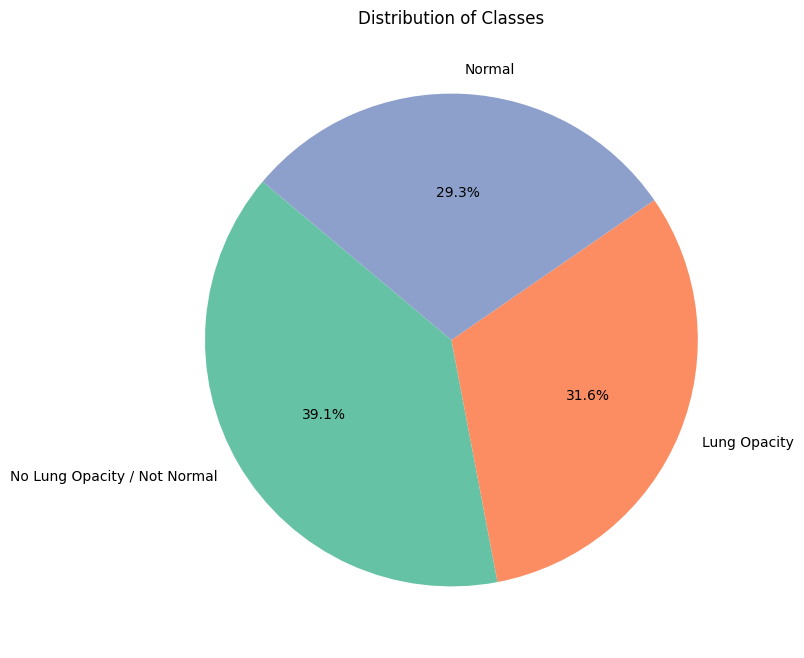

In [ ]:

# Count the number of occurances in the dataframe
class_counts = train_data['class'].value_counts()
#  set the labels for the pie chart
labels = ['No Lung Opacity / Not Normal', 'Lung Opacity', 'Normal']

#choose a colur palette
palette = sns.color_palette("Set2")

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=labels, colors=palette, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')

# Save the figure
plt.savefig('distribution_of_classes_pie_chart.png', bbox_inches='tight')

# Display the plot
plt.show()


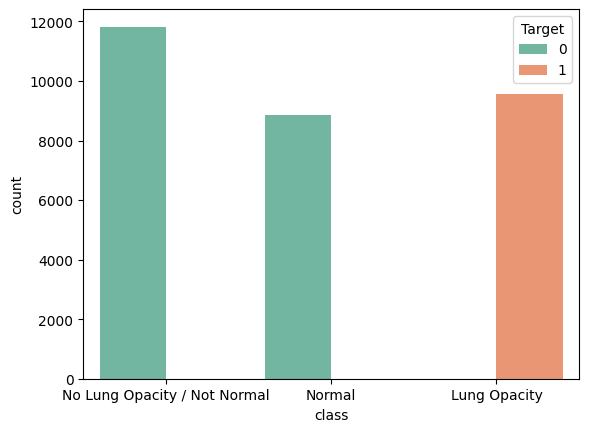

In [ ]:
# visualise the distribution of classes
sns.countplot(x = 'class', hue = 'Target', data = train_data, palette='Set2')


#Save the figure
plt.savefig('class_distribution_countplot.png', bbox_inches='tight')
# Disply the plot
plt.show()

In [ ]:
# fill the null values
train_data.fillna(0.0)

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2      00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    0.0    0.0    0.0     0.0   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    0.0    0.0    0.0     0.0   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class  
0           0  No Lung Opacity / Not Normal  
1           0  No Lung Opacity / Not Normal  
2           0  No Lung Opacity / Not Normal  
3           0                        Normal  
4           1                  Lung Opacity  
...       ...                           ...  
30222       1                  Lung Opacity  
30223       0                        Normal  
30224       0                        Normal  
30225       1                  Lung Opacity  
30226       1                  Lung Opacity  

[30227 rows x 7 columns]

# Read in DICOM the Images

In [ ]:
!pip install pydicom

Defaulting to user installation because normal site-packages is not writeable


In [ ]:




# Define the path to the images
image_directory = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images'

## Get access to the list of image files in the directory
images = os.listdir(image_directory)


train_data['image_path'] = ''

# Iterate through the dataframr and set the image paths of the data frame
for i in range(len(train_data)):
    patient_id = train_data['patientId'][i]
    image_path = os.path.join(image_directory, patient_id + '.dcm')
    train_data.at[i, 'image_path'] = image_path

In [ ]:

!pip install pydicom




Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# upgrade pip
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Install pydicom
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#import libraries
import sys
print(sys.executable)


C:\Program Files\Python311\python.exe


In [ ]:

# Import libraries

import pydicom
import random

# Take a look  at the metadat from an image
random_patient_id = train_data['patientId'].sample().values[0]
dicom_data = pydicom.read_file(image_path)
# Print dicom_data
print (dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9955.1517874345.895762
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.9955.1517874345.895762
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom as dcm
import math
# Prepare the images for visulaiation
def inspectImages(data):
    img_data = list(data.T.to_dict().values())

       # Create a figure with 1 row and 3 columns
    f, ax = plt.subplots(1, 3, figsize=(16, 6))

    for i, data_row in enumerate(img_data):
        if i >= 3:  # plot only 3 images
            break

        patientImage = data_row['patientId']
        dcm_file = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images/{}.dcm'.format(patientImage)
        data_row_img_data = dcm.dcmread(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex

        ax[i].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone)
        ax[i].axis('off')
        ax[i].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nBounds: x:{} y:{} width:{} height:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row['x'], data_row['y'], data_row['width'], data_row['height']))

          # Draw bounding boxes
        if not math.isnan(data_row['x']):
            x, y, width, height = data_row['x'], data_row['y'], data_row['width'], data_row['height']
            rect = patches.Rectangle((x, y), width, height,
                                     linewidth=2,
                                     edgecolor='r',
                                     facecolor='none')
             # Draw the bounding box on top of the image
            ax[i].add_patch(rect)

    plt.tight_layout()

  # Save the figure
    plt.savefig('inspect_images_three.png', bbox_inches='tight')

      # Display  the imagee
    plt.show()


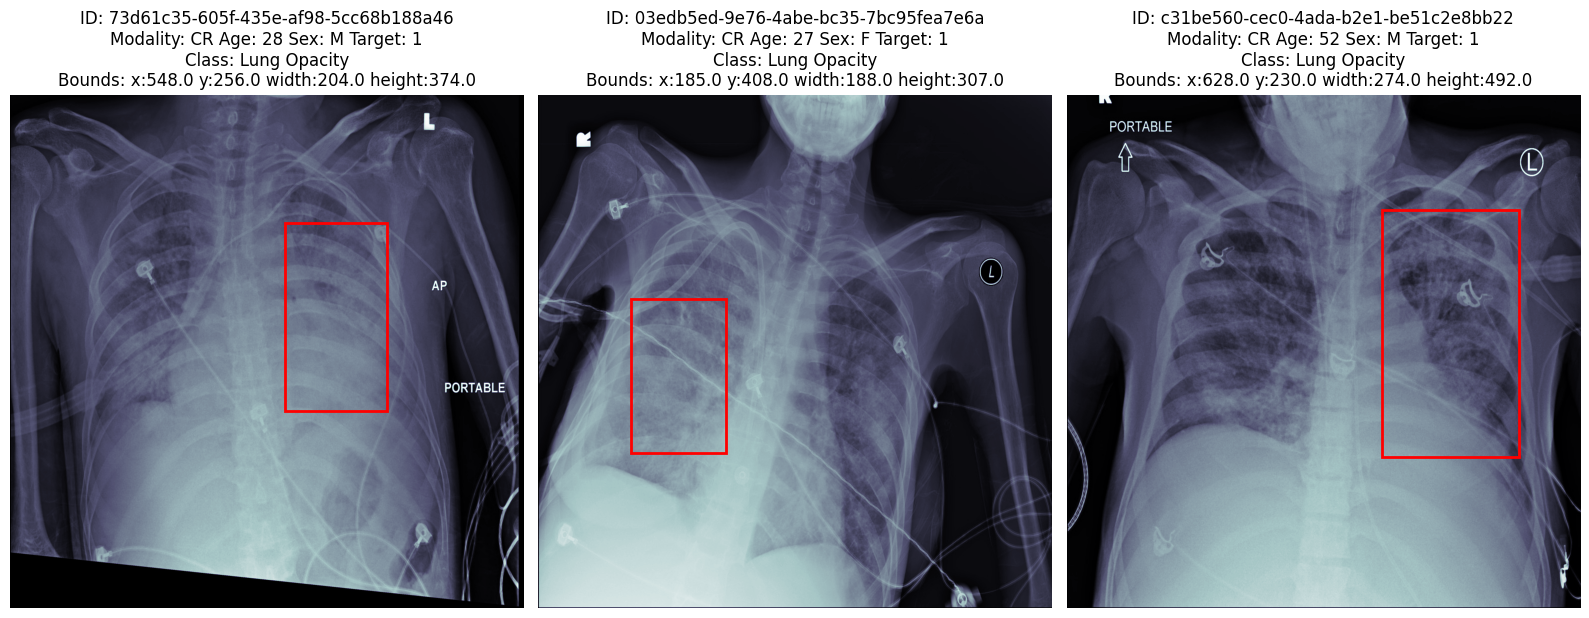

In [ ]:
#  Display a few images which deos not have pneumonia
inspectImages(train_data[train_data['Target'] == 1].sample(3))


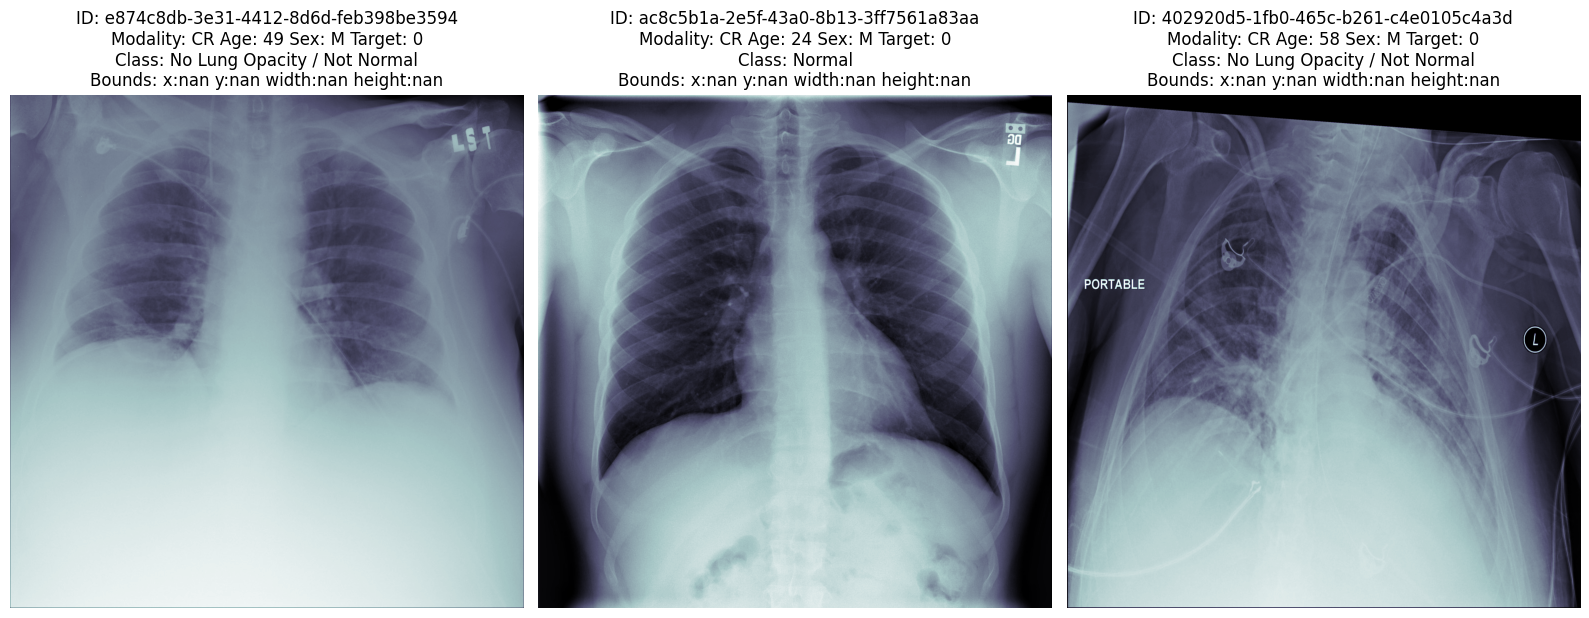

In [ ]:
# Display few images which does not have pneuonia
inspectImages(train_data[train_data['Target']==0].sample(3))

In [ ]:
#import library
import os

# Sample file path
pid = '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
dcm_file = os.path.join(image_directory, f'{pid}.dcm')
print(dcm_file)  # Verify the constructed file path


D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images\0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm


In [ ]:
# if the file exist
if not os.path.isfile(dcm_file):
    print(f"File not found: {dcm_file}")


Change the code below xxxxx

In [ ]:
from tqdm import tqdm
import pydicom
import pandas as pd
import os

def process_dicom_data(metadata_df):
    image_directory = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images'

    for n, pid in tqdm(enumerate(metadata_df['patientId'].unique()), total=metadata_df['patientId'].nunique()):
       # Construct the complete file path
        dcm_file = os.path.join(image_directory, f'{pid}.dcm')

        if not os.path.isfile(dcm_file):
            print(f"File not found: {dcm_file}")
            continue

        try:
            dcm_data = pydicom.read_file(dcm_file)

             # Handle missing values with get method and default values
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'Modality'] = dcm_data.get('Modality', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'PatientAge'] = pd.to_numeric(dcm_data.get('PatientAge', '0'))
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'PatientSex'] = dcm_data.get('PatientSex', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'BodyPartExamined'] = dcm_data.get('BodyPartExamined', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'ViewPosition'] = dcm_data.get('ViewPosition', 'Unknown')

        except (pydicom.errors.InvalidDicomError, Exception) as e:
            print(f"Error processing file {dcm_file}: {e}")

    return metadata_df


**to retype the below code **

In [ ]:
# Assign variable to dicom_data

dicom_data=train_data
dicom_data = process_dicom_data(dicom_data)

100%|████████████████████████████████████████████████████████████████████████████| 26684/26684 [05:22<00:00, 82.71it/s]


In [ ]:
# veiw the first few copies of dicom_data
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        51.0   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        48.0   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        19.0   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        28.0   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        32.0   

  PatientSex BodyPartExamined ViewPosition  
0          F            CHEST           PA  
1          F            CHEST           PA  
2          M            CHEST           AP  
3          M            CHEST           PA  
4          F            CHEST           AP

In [ ]:

# Convert the data type of the patient age column

dicom_data = dicom_data.astype({"PatientAge": int})

# fill missing files wth o.o
dicom_data.fillna(0.0, inplace=True)

# View the first few lines of the dataframe
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          51   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          48   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          19   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          28   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          32   

  PatientSex BodyPartExamined ViewPosition  
0          F            CHEST           PA  
1          F            CHEST           PA  
2          M            CHEST           AP  
3          M            CHEST           PA  
4          F            CHEST           AP

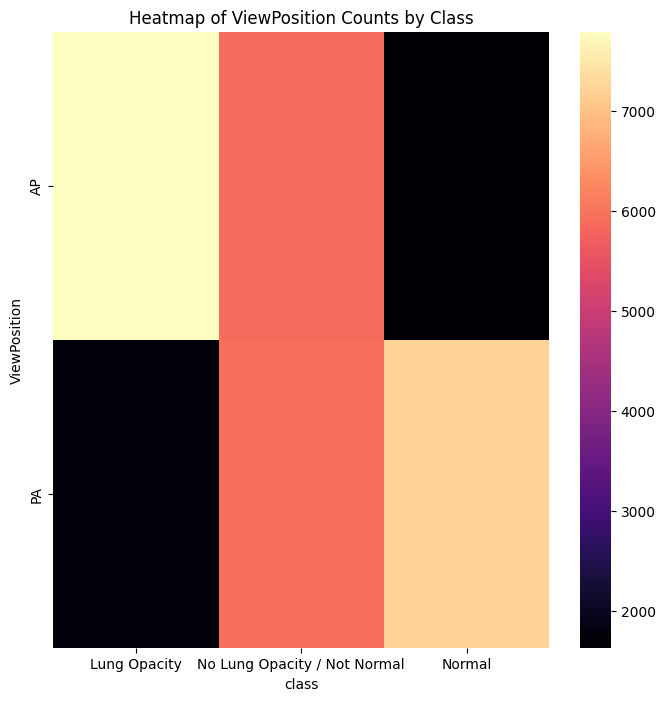

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ViewPosition'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='magma')




# label the axis
plt.xlabel('class')
plt.ylabel('ViewPosition')

# add a tittle  to the map
plt.title('Heatmap of ViewPosition Counts by Class')


# Save the figure
plt.savefig('heatmap_figure.png')

# show plot
plt.show()



In [ ]:
# Convert patient sex to numerical
dicom_data['PatientSex'] = dicom_data['PatientSex'].map({'F': 0, 'M': 1})

In [ ]:
#view the frist few lines of dicom _data
class_mapping = {'No Lung Opacity / Not Normal': 0, 'Normal': 0, 'Lung Opacity': 1}
dicom_data['ClassNumeric'] = dicom_data['class'].map(class_mapping)


In [ ]:
#view the frist few lines of dicom _data
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          51   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          48   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          19   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          28   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          32   

   PatientSex BodyPartExamined ViewPosition  ClassNumeric  
0           0            CHEST           PA             0  
1           0            CHEST           PA             0  
2           1            CHEST           AP             0  
3           1            CHEST           PA             0  
4           0            CHEST           AP             1

In [ ]:
# describe the dicom_ data
dicom_data.describe(include="all").T

count unique  \
patientId           30227  26684   
x                 30227.0    NaN   
y                 30227.0    NaN   
width             30227.0    NaN   
height            30227.0    NaN   
Target            30227.0    NaN   
class               30227      3   
image_path          30227  26684   
Modality            30227      1   
PatientAge        30227.0    NaN   
PatientSex        30227.0    NaN   
BodyPartExamined    30227      1   
ViewPosition        30227      2   
ClassNumeric      30227.0    NaN   

                                                                top   freq  \
patientId                      3239951b-6211-4290-b237-3d9ad17176db      4   
x                                                               NaN    NaN   
y                                                               NaN    NaN   
width                                                           NaN    NaN   
height                                                          NaN    NaN   
Target                                                          NaN    NaN   
class                                  No Lung Opacity / Not Normal  11821   
image_path        D:/rsna-pneumonia-detection-challenge (1)/stag...      4   
Modality                                                         CR  30227   
PatientAge                                                      NaN    NaN   
PatientSex                                                      NaN    NaN   
BodyPartExamined                                              CHEST  30227   
ViewPosition                                                     AP  15297   
ClassNumeric                                                    NaN    NaN   

                        mean         std  min   25%   50%    75%    max  
patientId                NaN         NaN  NaN   NaN   NaN    NaN    NaN  
x                 124.561683  216.326397  0.0   0.0   0.0  193.0  835.0  
y                 115.960962  190.012883  0.0   0.0   0.0  231.0  881.0  
width              69.060575  106.910496  0.0   0.0   0.0  169.0  528.0  
height            104.084825  176.932152  0.0   0.0   0.0  188.0  942.0  
Target              0.316108    0.464963  0.0   0.0   0.0    1.0    1.0  
class                    NaN         NaN  NaN   NaN   NaN    NaN    NaN  
image_path               NaN         NaN  NaN   NaN   NaN    NaN    NaN  
Modality                 NaN         NaN  NaN   NaN   NaN    NaN    NaN  
PatientAge         46.797764    16.89294  1.0  34.0  49.0   59.0  155.0  
PatientSex          0.569557    0.495146  0.0   0.0   1.0    1.0    1.0  
BodyPartExamined         NaN         NaN  NaN   NaN   NaN    NaN    NaN  
ViewPosition             NaN         NaN  NaN   NaN   NaN    NaN    NaN  
ClassNumeric        0.316108    0.464963  0.0   0.0   0.0    1.0    1.0

In [ ]:
# check the gender types

dicom_data.PatientSex.value_counts()


PatientSex
1    17216
0    13011
Name: count, dtype: int64

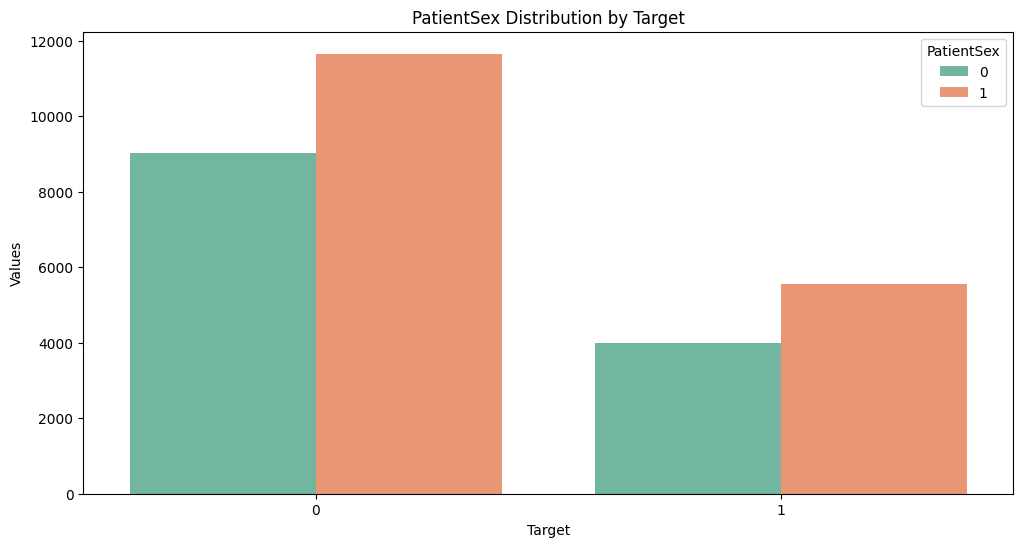

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create and plot the barplot
temp = dicom_data.groupby('Target')['PatientSex'].value_counts()
data_target_class = temp.reset_index(name='Values')

sns.barplot(x='Target', y='Values', hue='PatientSex', data=data_target_class, palette='Set2')

# Set title and figure size
plt.title('PatientSex and Target for Chest X-Ray Exams')
plt.gcf().set_size_inches(12, 6)


# Add a title to the heatmap
plt.title('PatientSex Distribution by Target')


# Save the figure
plt.savefig('patient_class_disstribution_by_class.png')

# disply the plot
plt.show()


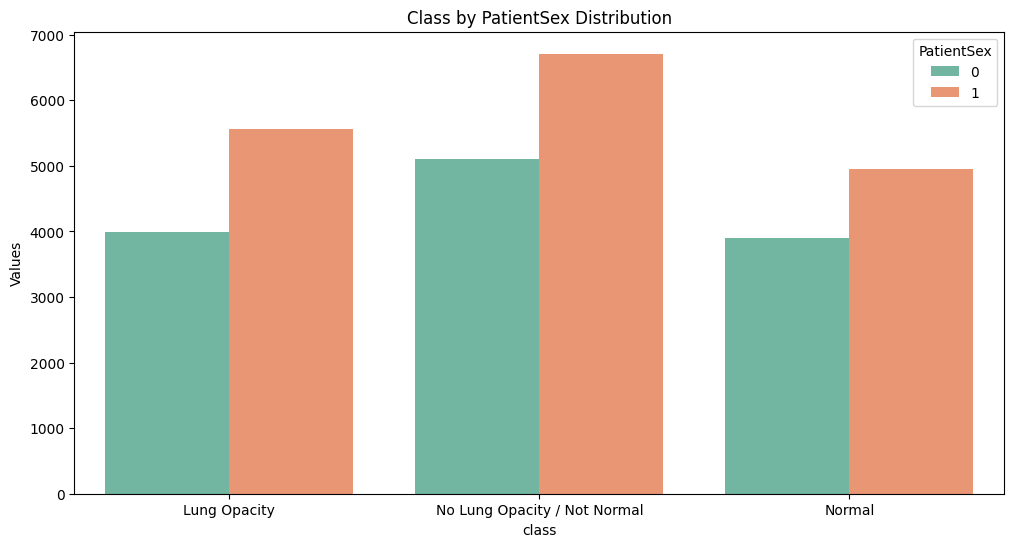

In [ ]:

# Distribution of pateint sex within the classes
fig, ax = plt.subplots(nrows = 1, figsize = (12, 6))
temp = dicom_data.groupby('class')['PatientSex'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()



sns.barplot(ax = ax, x = 'class', y = 'Values', hue = 'PatientSex', data = data_target_class, palette = 'Set2')
plt.title('Class by PatientSex Distribution')




# Save the figure
plt.savefig('class_by__patientsex_distribution.png')

# display plot
plt.show()


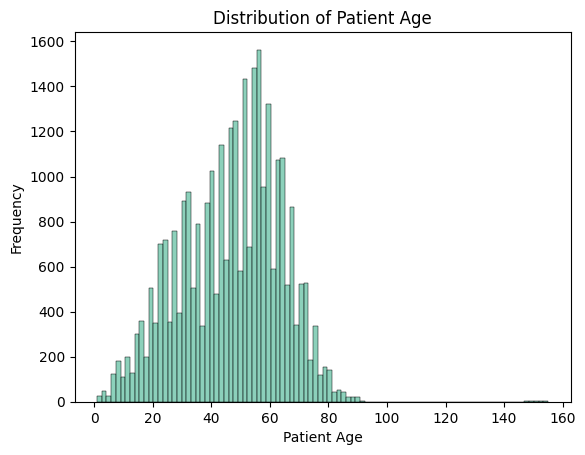

In [ ]:
# Set the colour of the palette
sns.set_palette("Set2")

# Create the histogram plot
sns.histplot(dicom_data['PatientAge'], kde=False, color=sns.color_palette("Set2")[0])


# Set plot labels and title
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')

# Save the figure
plt.savefig('distribution_by_patientage.png')

# show the plot
plt.show()


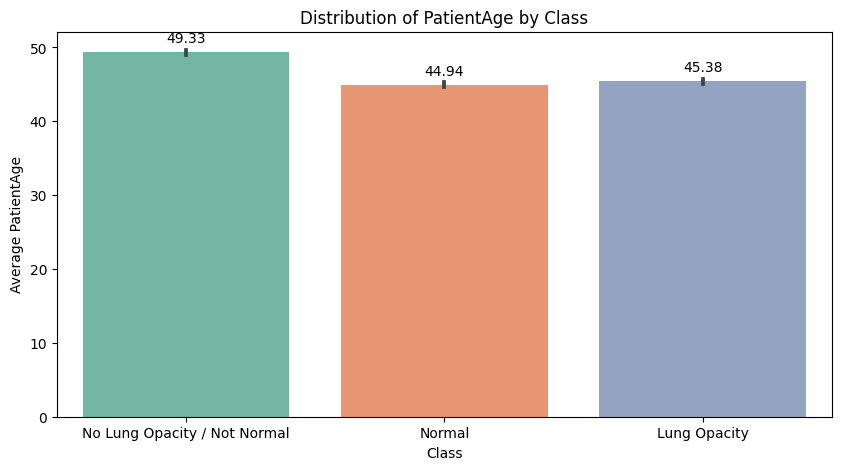

In [ ]:

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
ax = sns.barplot(x='class', y='PatientAge', data=dicom_data, palette='Set2')

# Add value annotations on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Set the plot labels and title
plt.xlabel('Class')
plt.ylabel('Average PatientAge')
plt.title('Distribution of PatientAge by Class')


# save figure
plt.savefig('distribution_of_patientage_by_class.png')

# show figure
plt.show()

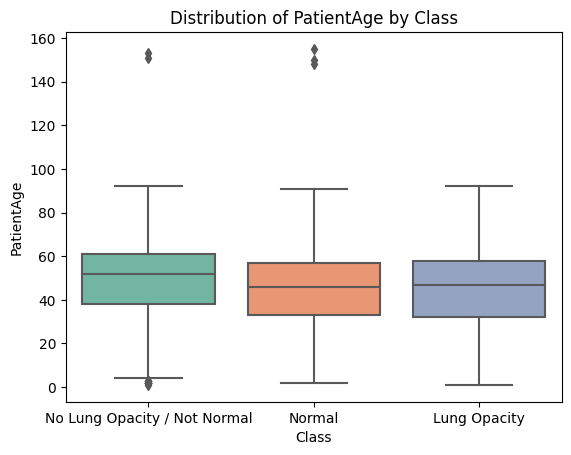

In [ ]:



# Create the box plot using colour palette

sns.boxplot(x='class', y='PatientAge', data=dicom_data, palette='Set2')


# Set labels and title
plt.xlabel('Class')
plt.ylabel('PatientAge')
plt.title('Distribution of PatientAge by Class')

# show the plot
plt.show()

Distribution of `PatientAge`: Overall and Target = 1


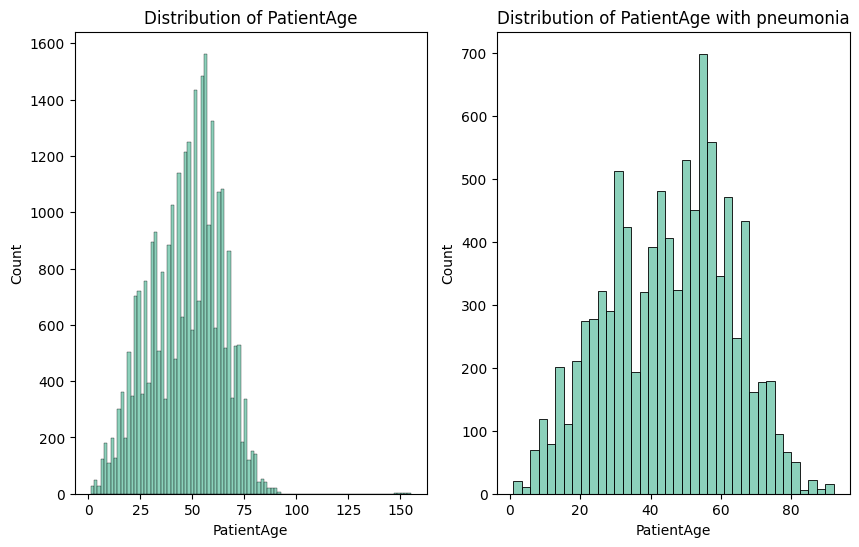

In [ ]:
print('Distribution of `PatientAge`: Overall and Target = 1')
fig = plt.figure(figsize=(10, 6)) # Define the size of the plot

ax = fig.add_subplot(121)
g = sns.histplot(dicom_data['PatientAge'])
g.set_title('Distribution of PatientAge')

ax = fig.add_subplot(122)
g = sns.histplot(dicom_data.loc[dicom_data['Target'] == 1, 'PatientAge'])
g.set_title('Distribution of PatientAge with pneumonia')


# Save figure
plt.savefig('distribution_of_patientAge_with_pneumonia.png')

# show figure
plt.show()

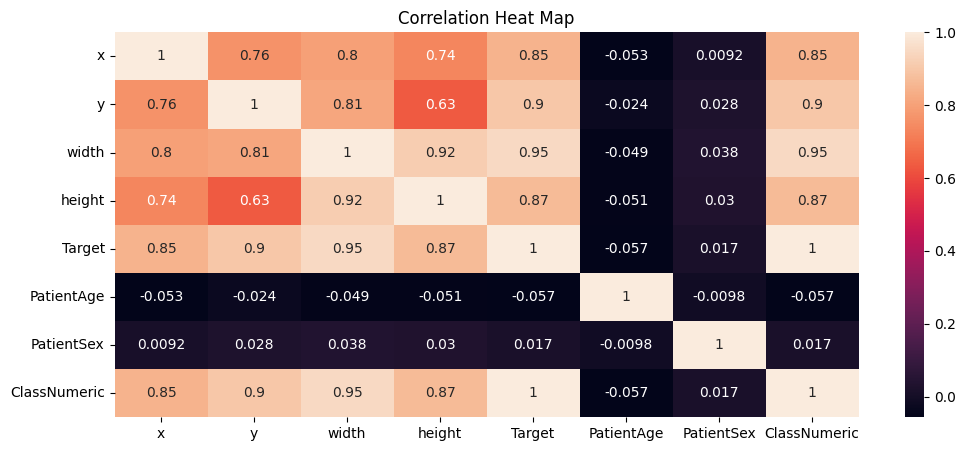

In [ ]:
corr = dicom_data.corr(numeric_only=True)
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True)

plt.title('Correlation Heat Map')



# save the figure
plt.savefig('correlation_heat_map.png')

# show the plot
plt.show()


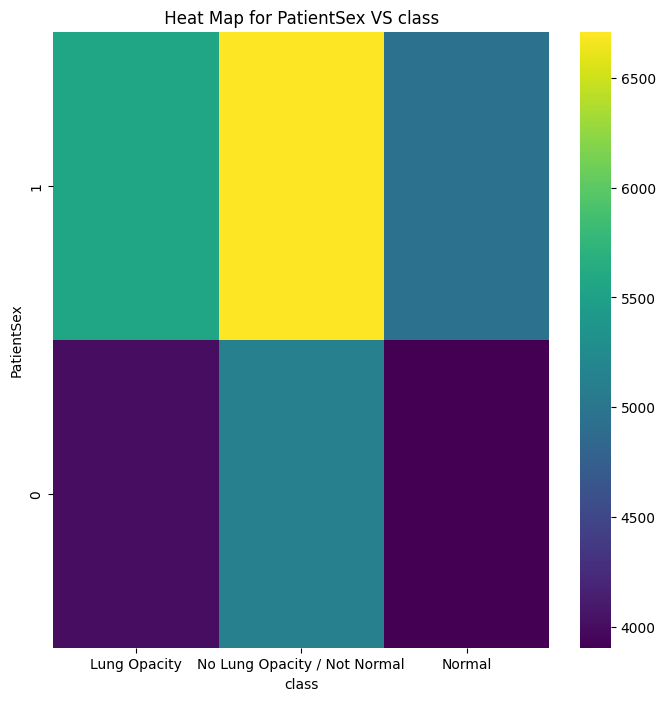

In [ ]:
# plot class vs patientSex
#import libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PatientSex'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('PatientSex')


plt.title(' Heat Map for PatientSex VS class ')

# save figure
plt.savefig('correlation_heat_map_ for_patient_vs_class.png')

# show figure
plt.show()


Heat map of class vs. View position

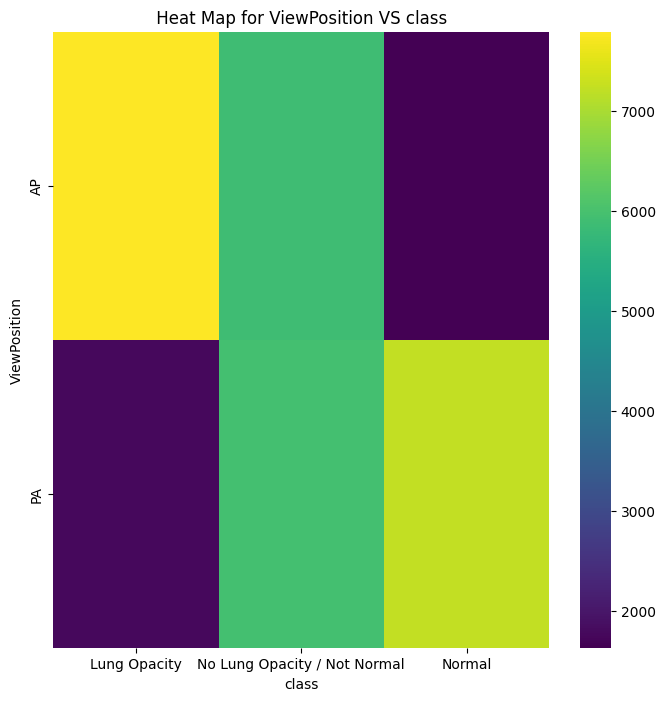

In [ ]:
# @title class vs ViewPosition

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ViewPosition'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('ViewPosition')



plt.title(' Heat Map for ViewPosition VS class ')

# save figure
plt.savefig('correlation_heat_map_ for_viewposition_vs_class.png')

#show figure
plt.show()


In [ ]:
# columnd needed for binary classification
required_columns = [
    'patientId', 'class', 'image_path', 'PatientAge', 'PatientSex',
    'Modality', 'BodyPartExamined', 'ViewPosition', 'ClassNumeric'
]


# select only the required columns
pneumonia_train_data = dicom_data[required_columns]
pneumonia_train_data.head()



patientId                         class  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   

                                          image_path  PatientAge  PatientSex  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...          51           0   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...          48           0   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...          19           1   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...          28           1   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...          32           0   

  Modality BodyPartExamined ViewPosition  ClassNumeric  
0       CR            CHEST           PA             0  
1       CR            CHEST           PA             0  
2       CR            CHEST           AP             0  
3       CR            CHEST           PA             0  
4       CR            CHEST           AP             1

In [ ]:
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import pydicom
import cv2
from tensorflow.keras.utils import Sequence

# preprocessing and batching of DICOM images for training machine learning models
class DICOMDataGenerator(Sequence):
    def __init__(self, dataframe, batch_size=32, target_size=(224, 224), shuffle=True):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataframe))
        self.on_epoch_end()


        self.datagen = ImageDataGenerator()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = [self.dataframe.iloc[k] for k in indexes]
        X, y = self.__data_generation(batch_data)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        X = np.empty((self.batch_size, *self.target_size, 3))
        y = np.empty((self.batch_size), dtype=int)
        for i, data in enumerate(batch_data):
            img_path = data['image_path']
            try:
                dicom = pydicom.dcmread(img_path)
                img = dicom.pixel_array
                img = cv2.resize(img, self.target_size)
                if len(img.shape) == 2:   # convert grayscale image to 3-channel images
                    img = np.stack((img,) * 3, axis=-1)

                # no augumntation
                X[i,] = img / 255.0
                y[i] = data['ClassNumeric']
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                X[i,] = np.zeros((*self.target_size, 3))
                y[i] = 0
        return X, y


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Sample 5000 random entries from the dataset
pneumonia_train_data['ClassNumeric'] = pneumonia_train_data['ClassNumeric'].astype(int)

# split data
train_data, test_data = train_test_split(pneumonia_train_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create data generators
train_generator = DICOMDataGenerator(train_data, batch_size=32, target_size=(224, 224))
val_generator = DICOMDataGenerator(val_data, batch_size=32, target_size=(224, 224))
test_generator = DICOMDataGenerator(test_data, batch_size=32, target_size=(224, 224))



C:\Users\770746\AppData\Local\Temp\ipykernel_8804\460145070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_train_data['ClassNumeric'] = pneumonia_train_data['ClassNumeric'].astype(int)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import tensorflow as tf

# Define a custom F1 score metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    p = tp / (tp + fp + tf.keras.backend.epsilon())
    r = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * p * r / (p + r + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)


# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
#compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), f1_score])

In [ ]:
#print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

#Train Model

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# Define the early stopping call back
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor
    patience=3,    # Number od epoches with no improvement ater training
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of monitored metric
    verbose=1
)

# Trainthe model with earlystopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)



Epoch 1/20
604/604 [==============================] - 477s 789ms/step - loss: 0.5243 - accuracy: 0.7498 - auc: 0.7849 - f1_score: 0.5088 - val_loss: 0.4763 - val_accuracy: 0.7717 - val_auc: 0.8207 - val_f1_score: 0.6157
Epoch 2/20
604/604 [==============================] - 434s 717ms/step - loss: 0.4770 - accuracy: 0.7729 - auc: 0.8180 - f1_score: 0.5876 - val_loss: 0.4586 - val_accuracy: 0.7827 - val_auc: 0.8370 - val_f1_score: 0.6242
Epoch 3/20
604/604 [==============================] - 485s 802ms/step - loss: 0.4569 - accuracy: 0.7892 - auc: 0.8359 - f1_score: 0.6225 - val_loss: 0.4501 - val_accuracy: 0.7895 - val_auc: 0.8444 - val_f1_score: 0.6165
Epoch 4/20
604/604 [==============================] - 442s 731ms/step - loss: 0.4324 - accuracy: 0.7991 - auc: 0.8552 - f1_score: 0.6418 - val_loss: 0.4473 - val_accuracy: 0.7968 - val_auc: 0.8479 - val_f1_score: 0.6445
Epoch 5/20
604/604 [==============================] - 491s 812ms/step - loss: 0.3970 - accuracy: 0.8214 - auc: 0.8798 - 

#  Save the Model


In [ ]:
# Save the model with the prefered name
model.save('my_model.h5')
print("Model saved to 'my_model.h5'")


C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to 'my_model.h5'


3. Plot Training History
Plot the training and validation metrics to visualize the performance over epochs.

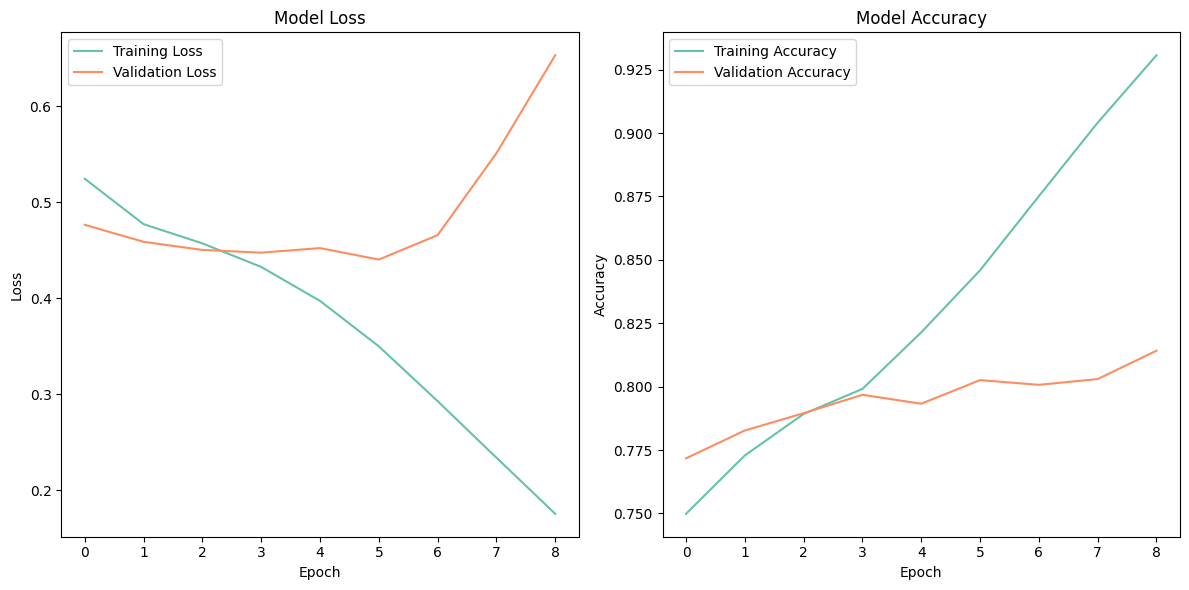

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss values
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plot model loss and model accuracy
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (No Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()



# Evaluate the Model
Evaluate the model on your test data and print the results.

1/1 [==============================] - 0s 106ms/step
Test Loss: 0.4573
Test Accuracy (from evaluate): 0.8032
Test Accuracy (manual): 0.8035
Test Precision: 0.7063
Test Recall: 0.6476
Test AUC (from evaluate): 0.8506
ROC AUC (manual): 0.8508
Test F1 Score: 0.6624


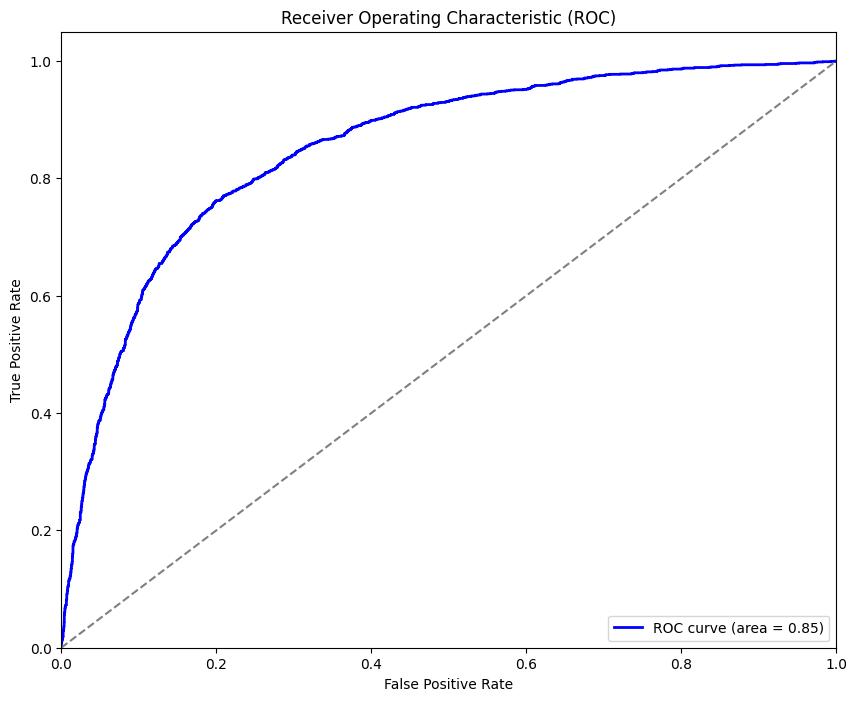

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score

# Evaluate the model as the test data
test_loss, test_accuracy, test_auc, test_f1 = model.evaluate(test_generator, verbose=1)


# Collect true labels and predicted probabilities
y_true = []
y_pred_probs = []

for x_test, y_test in test_generator:
    y_true.extend(y_test)
    probs = model.predict(x_test)
    y_pred_probs.extend(probs)

# Conver lists to numby arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)


# Calculate pricted classes
y_pred = np.round(y_pred_probs).astype(int)


# Calculate precision , recal and accuracy
test_precision = precision_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)
test_accuracy_manual = accuracy_score(y_true, y_pred)


# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Print the result
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy (from evaluate): {test_accuracy:.4f}")
print(f"Test Accuracy (manual): {test_accuracy_manual:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC (from evaluate): {test_auc:.4f}")
print(f"ROC AUC (manual): {roc_auc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print F1 Score, Precision, and AUC


In [ ]:
from sklearn.metrics import classification_report
import numpy as np


# Predict the labels for the test set
test_labels = []
test_predictions = []

# Iterate over the test generator
for x_test, y_test in test_generator:
    test_labels.extend(y_test)
    predictions = model.predict(x_test)
    test_predictions.extend(predictions.round().astype(int))

# Convert lists to numpy arrays
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)

# Generate the classification report
report = classification_report(test_labels, test_predictions, target_names=['Class 0', 'Class 1'])
print(report)



1/1 [==============================] - 0s 108ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      4115
     Class 1       0.71      0.65      0.68      1901

    accuracy                           0.80      6016
   macro avg       0.77      0.76      0.77      6016
weighted avg       0.80      0.80      0.80      6016



 # Plot Confusion Matrix
Finally, visualize the confusion matrix to understand the classification performance.

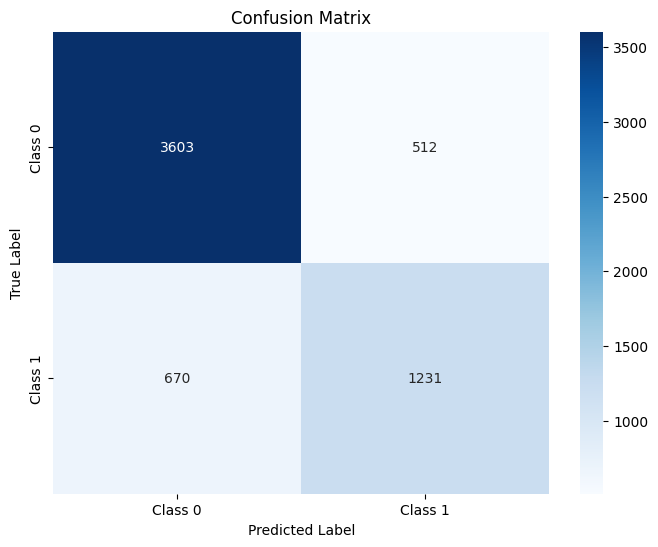

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#compute the confussion marix
cm = confusion_matrix(test_labels, test_predictions)

#plot the confusioon matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 102ms/step
Shape of images in the batch: (224, 224, 3)


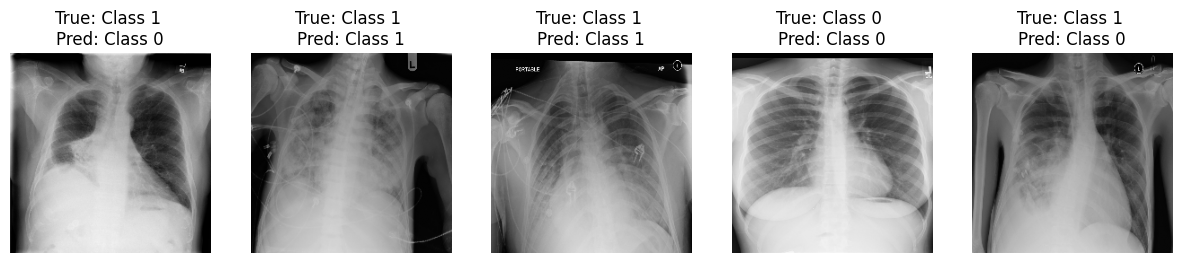

In [ ]:
import matplotlib.pyplot as plt

def plot_images_with_predictions(images, true_labels, predictions, class_names, num_images=5):
    plt.figure(figsize=(15, 5))

 # Check the shape of the first image
    img_shape = images[0].shape
    print(f"Shape of images in the batch: {img_shape}")

    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        #adjust the shape based on the actual dimension
        if len(img_shape) == 3:   # colour or gray image with channel dimension
            plt.imshow(images[i])
        else:  # Grayscale images
            plt.imshow(images[i].reshape((224, 224)), cmap='gray')
        plt.title(f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predictions[i])]}")  # Ensure labels are integers
        plt.axis('off')

    plt.show()

#Fetch a batch of images and labels from the test generator
for x_test_batch, y_test_batch in test_generator:
    break  # Get the only bathch for display

#Generate predictions for this batch
predictions_batch = model.predict(x_test_batch).round()

# adjust binary classification
class_names = ['Class 0', 'Class 1']

#Display the images
plot_images_with_predictions(x_test_batch, y_test_batch, predictions_batch, class_names, num_images=5)


Step-by-Step Integration with Keras Tuner


In [ ]:
# insatll turner library  to assist with hyparameter tunining

pip install keras-tuner


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Define the Model Function

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from keras_tuner import HyperParameters
from sklearn.metrics import f1_score


# Define the function to buld the model
def build_model(hp):  # create an insatance of hyper parameter tuning
    model = Sequential() # Initialise sequential mode
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    model.add(MaxPooling2D((2, 2)))  # add the first conv. layer

    model.add(Conv2D(                  # add the second conv. layer
        filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_3_filters', min_value=128, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=64),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.01, max_value=0.1, step=0.01))
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1)))  # add a drop out layer for regularization
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    )

    # Print model summary
    model.summary()

    return model


Trial 5 Complete [00h 43m 21s]
val_auc: 0.8227815628051758

Best val_auc So Far: 0.8227815628051758
Total elapsed time: 05h 00m 38s
Search completed successfully.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 96)      27744     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)       

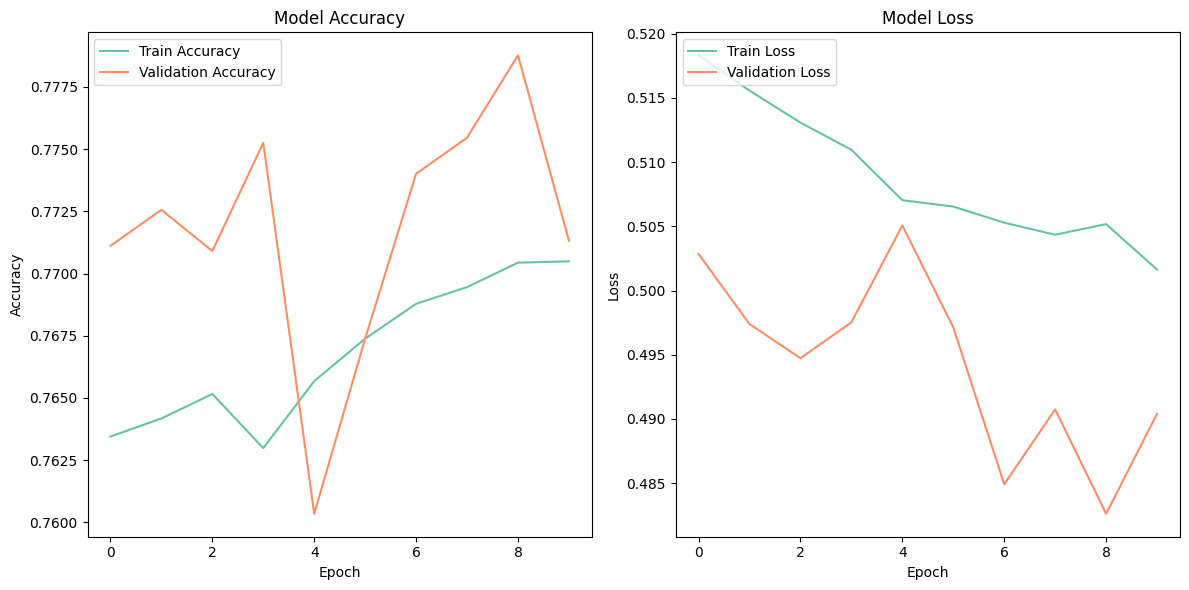

188/188 [==============================] - 76s 408ms/step - loss: 0.5035 - accuracy: 0.7626 - auc: 0.8096 - precision: 0.6608 - recall: 0.5105
Test Loss: 0.5034552216529846
Test Accuracy: 0.7626329660415649
Test AUC: 0.8096277117729187
Test Precision: 0.6607629656791687
Test Recall: 0.5105262994766235


In [ ]:
import keras_tuner as kt
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import shutil


# Define the objectivity properly
objective = kt.Objective('val_auc', direction='max')

#Define the randon search turner
tuner = kt.RandomSearch(
    build_model,   # build model
    objective=objective,
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='pneumonia_model_tuning'
)

# Clear old tuner data
shutil.rmtree('my_dir', ignore_errors=True)

# Search the best parameters
try:
    tuner.search(
        train_generator,            # trainable data
        validation_data=val_generator,   # validation data
        epochs=5                    # Number of epoches

    )
    print("Search completed successfully.")
except Exception as e:
    print(f"An error occurred during search: {e}")

#Get the best model and hyper parameters
try:
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("Best Hyperparameters:", best_hyperparameters.values)
except Exception as e:
    print(f"An error occurred when retrieving the best model: {e}")

# Train the best model again on the full training data
if best_model:
    try:
        history = best_model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=10
        )

        #plot model history
        def plot_history(history):
            # Extract the history dictionary
            hist = history.history


            #plot training and validation accuracy values
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(hist['accuracy'], label='Train Accuracy')
            plt.plot(hist['val_accuracy'], label='Validation Accuracy')
            plt.title('Model Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(loc='upper left')

            #Plot training and validation loss values
            plt.subplot(1, 2, 2)
            plt.plot(hist['loss'], label='Train Loss')
            plt.plot(hist['val_loss'], label='Validation Loss')
            plt.title('Model Loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(loc='upper left')

            plt.tight_layout()
            plt.show()


        # Call the function to plot the history
        plot_history(history)

    except Exception as e:
        print(f"An error occurred during training: {e}")


# Get the best model and hyper parameters
try:
    test_loss, test_acc, test_auc, test_precision, test_recall = best_model.evaluate(test_generator)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_acc}')
    print(f'Test AUC: {test_auc}')
    print(f'Test Precision: {test_precision}')
    print(f'Test Recall: {test_recall}')
except Exception as e:
    print(f"An error occurred during evaluation: {e}")


2. Compute Precision, Recall, F1 Score, AUC, and Confusion Matrix
To compute these metrics, you will need to evaluate your model on the test set. Make sure you have the necessary libraries imported:

188/188 [==============================] - 60s 320ms/step - loss: 0.5033 - accuracy: 0.7628 - auc: 0.8100 - precision: 0.6617 - recall: 0.5103
Test Loss: 0.5032522082328796
Test Accuracy: 0.7627992033958435
Test AUC: 0.8099945783615112
Test Precision: 0.6616643667221069
Test Recall: 0.5102577805519104
1/1 [==============================] - 0s 140ms/step
Precision: 0.6607629427792916
Recall: 0.5099894847528917
Accuracy: 0.7623005319148937
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83      4114
           1       0.66      0.51      0.58      1902

    accuracy                           0.76      6016
   macro avg       0.73      0.69      0.71      6016
weighted avg       0.75      0.76      0.75      6016



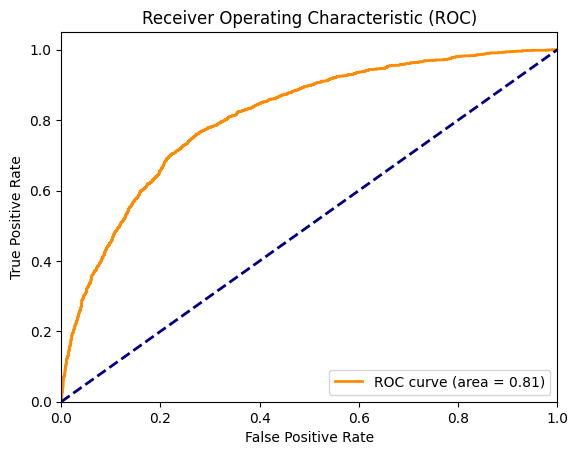

Confusion Matrix:
[[3616  498]
 [ 932  970]]


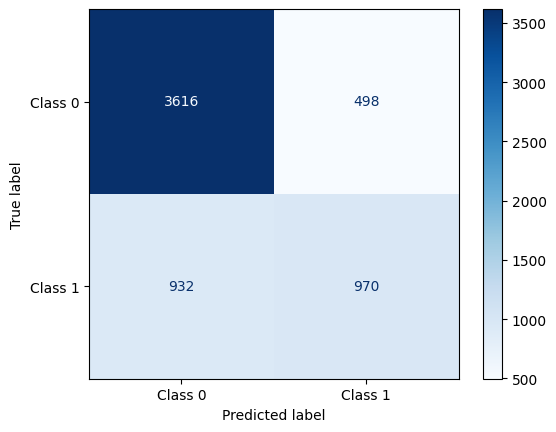

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define function to get true labels and prediction from a data generator
def get_labels_and_predictions(generator, model):
    y_true = []
    y_pred = []
    for batch in generator:
        X_batch, y_batch = batch
        y_true.extend(y_batch)
        y_pred.extend(model.predict(X_batch))
    return np.array(y_true), np.array(y_pred).flatten()


try:
    #Get prediction and true labels
    test_loss, test_accuracy, test_auc, test_precision, test_recall = best_model.evaluate(test_generator)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test AUC: {test_auc}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")

    # Get predictions and true labels
    y_true, y_pred = get_labels_and_predictions(test_generator, best_model)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Compute and print precision, recall, and accuracy

    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    accuracy = accuracy_score(y_true, y_pred_classes)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")

    # Print classification report

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

    # Compute and plot ROC curve

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Compute and plot confusion matrix

    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
    cmd.plot(cmap='Blues')
    plt.show()

except ValueError as e:
    print(f"Error occurred: {e}")


1/1 [==============================] - 0s 129ms/step
Shape of images in the batch: (224, 224, 3)


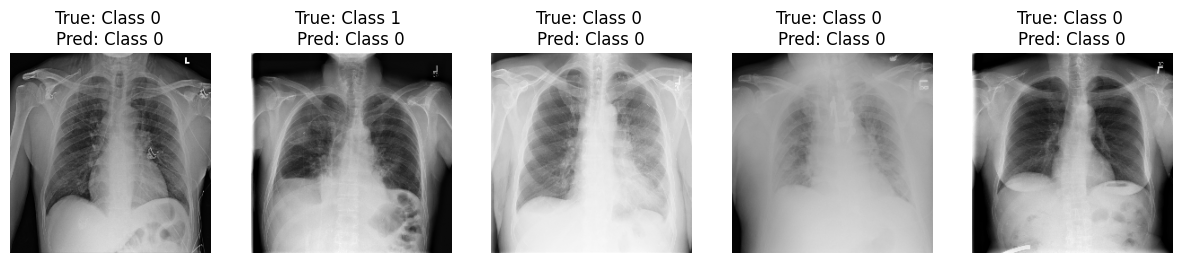

In [ ]:
import matplotlib.pyplot as plt

def plot_images_with_predictions(images, true_labels, predictions, class_names, num_images=5):
    plt.figure(figsize=(15, 5))


    # Check the shape of the first image
    img_shape = images[0].shape
    print(f"Shape of images in the batch: {img_shape}")

    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)

        # adjust the shape based on the  actual dimension
        if len(img_shape) == 3: # Color or gray image with a channelm dimension
            plt.imshow(images[i])
        else:  # gray colour scale
            plt.imshow(images[i].reshape((224, 224)), cmap='gray')
        plt.title(f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predictions[i])]}")  # Ensure labels are integers
        plt.axis('off')

    plt.show()


# get batch of images and labels from the test generator
for x_test_batch, y_test_batch in test_generator:
    break  # get only the first batch and disply


# get prediction for this batch
predictions_batch = model.predict(x_test_batch).round()


# adjust class_names
class_names = ['Class 0', 'Class 1']

# Display the images
plot_images_with_predictions(x_test_batch, y_test_batch, predictions_batch, class_names, num_images=5)

# **# CNN Model with Original Data with Augumentation**

# Import Libraries

In [ ]:
#! pip install pydicom

import cv2
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
#from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dropout
print('successfully imported')

successfully imported


In [ ]:
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
# read in the detailed calss info
class_info = pd.read_csv('stage_2_detailed_class_info.csv')
# read in the train labels infromation
train_labels = pd.read_csv('stage_2_train_labels.csv')

In [ ]:

# Asssign a directory for the labels
dicom_dir = "D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images"


In [ ]:
# See the number of the images in the DICOM file
num_dicom = os.listdir(dicom_dir)# Print the number of images
print(len(num_dicom))

26685


In [ ]:

#Check the shape of the class file
print(class_info.shape)
# Check the shape of the label file
print(train_labels.shape)

(30227, 2)
(30227, 6)


In [ ]:
# Check the first five lines to see the class data
print(class_info.head())


# Check the first lines to view the train_data dataframe
train_labels.head()

                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [ ]:
# Check for duplicates in the class_info dataframe
duplicates = class_info[class_info.duplicated(['patientId'], keep=False)]

#Display the entries that are duplicates
print(f" The number of duplicate entries are: {duplicates.shape[0]}")
print(duplicates.head())

#Check for duplicates in the class _info dataframe
duplicates = train_labels[train_labels.duplicated(['patientId'], keep=False)]



#Display the entries that are duplicates
print(f" The number of duplicate entries are: {duplicates.shape[0]}")

#Display the first lines of the duplicates
print(duplicates.head())

 The number of duplicate entries are: 6941
                               patientId         class
4   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
8   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
14  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
 The number of duplicate entries are: 6941
                               patientId      x      y  width  height  Target
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1
14  00aecb01-a116-45a2-956c-08d2fa55433f  288.0  322.0   94.0   135.0       1


In [ ]:
#merge the trin_label csv and class_ info csv files
train_data = pd.concat([train_labels, class_info["class"]], axis=1,sort=False)


In [ ]:
# View the first five lines of the data frame
train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [ ]:

#check missing values
train_data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [ ]:
# Check number of entries and total munber of columns inthe train _ data dia frame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
# check for null values
train_data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

# Exploratory Data Analyses (EDA)

In [ ]:
# Display basic statistics of the data
print(train_data.head())
print(train_data.info())
print(train_data['Target'].value_counts())

                              patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   wi

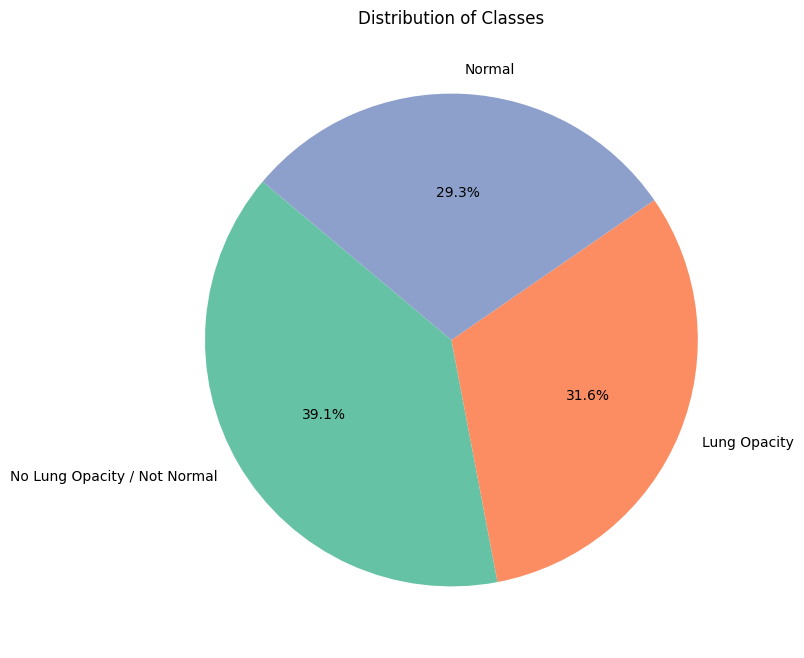

In [ ]:
# Count the number of occurrences of the classes in the dataframe
class_counts = train_data['class'].value_counts()

# Define labels for the pie chart
labels = ['No Lung Opacity / Not Normal', 'Lung Opacity', 'Normal']

# choose the colour of the palette
palette = sns.color_palette("Set2")

#plot te figure
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=labels, colors=palette, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')

#Save rhe figure
plt.savefig('distribution_of_classes_pie_chart.png', bbox_inches='tight')

#Display the plot
plt.show()


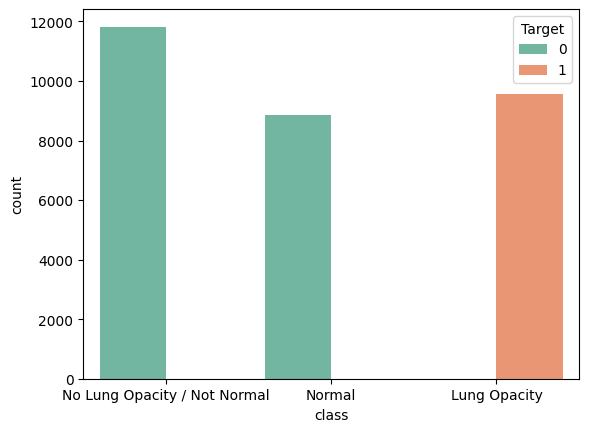

In [ ]:
#visualise the distribution classes
sns.countplot(x = 'class', hue = 'Target', data = train_data, palette='Set2')

# save the figure
plt.savefig('class_distribution_countplot.png', bbox_inches='tight')

#show the plot
plt.show()

In [ ]:
# Fill the nan values with zero
train_data.fillna(0.0)

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2      00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    0.0    0.0    0.0     0.0   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    0.0    0.0    0.0     0.0   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class  
0           0  No Lung Opacity / Not Normal  
1           0  No Lung Opacity / Not Normal  
2           0  No Lung Opacity / Not Normal  
3           0                        Normal  
4           1                  Lung Opacity  
...       ...                           ...  
30222       1                  Lung Opacity  
30223       0                        Normal  
30224       0                        Normal  
30225       1                  Lung Opacity  
30226       1                  Lung Opacity  

[30227 rows x 7 columns]

# Read the images In

In [ ]:
# tall pydycom
!pip install pydicom

Defaulting to user installation because normal site-packages is not writeable


In [ ]:




#Define the path to theimages
image_directory = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images'

# Get access to the list of image file in the directory
images = os.listdir(image_directory)


train_data['image_path'] = ''

#iterate through the Dataframe and set the image path
for i in range(len(train_data)):
    patient_id = train_data['patientId'][i]
    image_path = os.path.join(image_directory, patient_id + '.dcm')
    train_data.at[i, 'image_path'] = image_path

In [ ]:

!pip install pydicom




Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#upgrade pip
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:

#import library
import sys
print(sys.executable)


C:\Program Files\Python311\python.exe


In [ ]:
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#import pydycom
import pydicom

In [ ]:


#import library
import pydicom
import random

# take alook athe data of a random image from the train_data dataframe
random_patient_id = train_data['patientId'].sample().values[0]
dicom_data = pydicom.read_file(image_path)

print (dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9955.1517874345.895762
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.9955.1517874345.895762
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom as dcm
import math

def inspectImages(data):
    img_data = list(data.T.to_dict().values())

      # Create a figure with 1 row and 3 columns
    f, ax = plt.subplots(1, 3, figsize=(16, 6))

    for i, data_row in enumerate(img_data):
        if i >= 3:  # only plot up to 3 images
            break

        patientImage = data_row['patientId']
        dcm_file = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images/{}.dcm'.format(patientImage)
        data_row_img_data = dcm.dcmread(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex

        ax[i].imshow(data_row_img_data.pixel_array, cmap=plt.cm.bone)
        ax[i].axis('off')
        ax[i].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nBounds: x:{} y:{} width:{} height:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'],
                data_row['x'], data_row['y'], data_row['width'], data_row['height']))

     # Draw bounding box making sure that the cordinates are valid
        if not math.isnan(data_row['x']):
            x, y, width, height = data_row['x'], data_row['y'], data_row['width'], data_row['height']
            rect = patches.Rectangle((x, y), width, height,
                                     linewidth=2,
                                     edgecolor='r',
                                     facecolor='none')
            #make the bounding box to be place on the image top
            ax[i].add_patch(rect)

    plt.tight_layout()

     #save the figure
    plt.savefig('inspect_images_three.png', bbox_inches='tight')

    #  #Show the image
    plt.show()


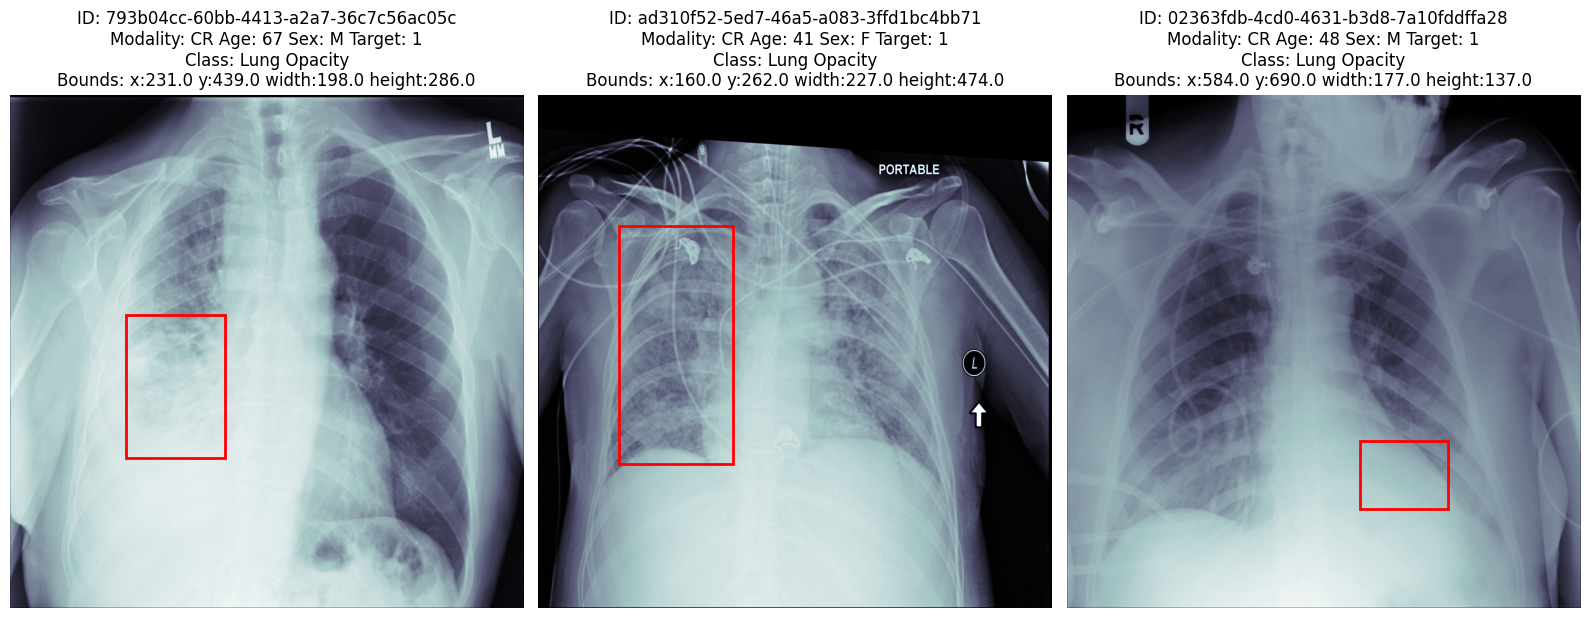

In [ ]:
# Display few images whic do not have pneumonia
inspectImages(train_data[train_data['Target'] == 1].sample(3))


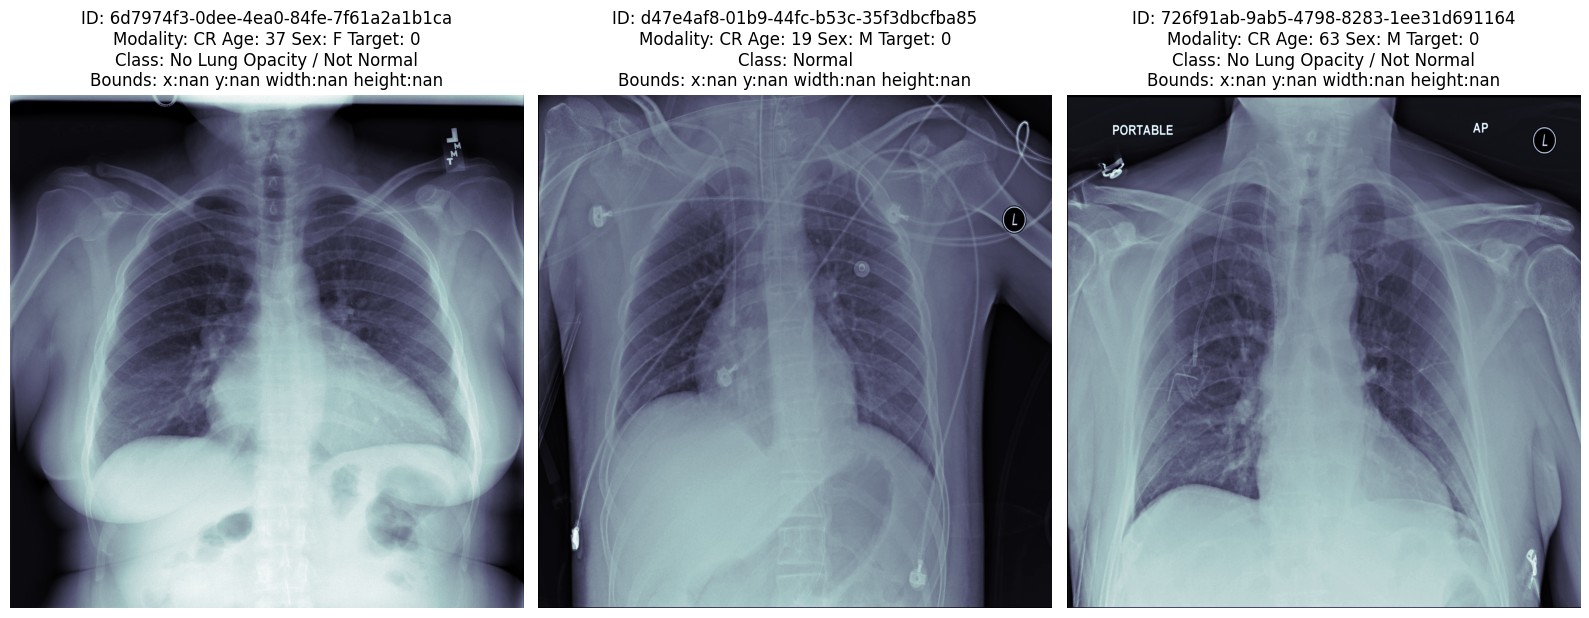

In [ ]:
# Display few images which does not have pneuonia
inspectImages(train_data[train_data['Target']==0].sample(3))

In [ ]:
import os

# Sample file path
pid = '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
dcm_file = os.path.join(image_directory, f'{pid}.dcm')
print(dcm_file)  # Verify the constructed file path


D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images\0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm


In [ ]:
if not os.path.isfile(dcm_file):
    print(f"File not found: {dcm_file}")


Change the code below xxxxx

In [ ]:

# import libraries

from tqdm import tqdm
import pydicom
import pandas as pd
import os

def process_dicom_data(metadata_df):
    image_directory = 'D:/rsna-pneumonia-detection-challenge (1)/stage_2_train_images'

    for n, pid in tqdm(enumerate(metadata_df['patientId'].unique()), total=metadata_df['patientId'].nunique()):
        # Construct the complete file path
        dcm_file = os.path.join(image_directory, f'{pid}.dcm')

        if not os.path.isfile(dcm_file):
            print(f"File not found: {dcm_file}")
            continue

        try:
            dcm_data = pydicom.read_file(dcm_file)

            # Handle missing attributes with `get` method and default values
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'Modality'] = dcm_data.get('Modality', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'PatientAge'] = pd.to_numeric(dcm_data.get('PatientAge', '0'))
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'PatientSex'] = dcm_data.get('PatientSex', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'BodyPartExamined'] = dcm_data.get('BodyPartExamined', 'Unknown')
            metadata_df.loc[metadata_df['patientId'] == dcm_data.PatientID, 'ViewPosition'] = dcm_data.get('ViewPosition', 'Unknown')

        except (pydicom.errors.InvalidDicomError, Exception) as e:
            print(f"Error processing file {dcm_file}: {e}")

    return metadata_df


**to retype the below code **

In [ ]:
# assigning the variable decom_data

dicom_data=train_data
dicom_data = process_dicom_data(dicom_data)

100%|████████████████████████████████████████████████████████████████████████████| 26684/26684 [05:23<00:00, 82.37it/s]


In [ ]:
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        51.0   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        48.0   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        19.0   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        28.0   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR        32.0   

  PatientSex BodyPartExamined ViewPosition  
0          F            CHEST           PA  
1          F            CHEST           PA  
2          M            CHEST           AP  
3          M            CHEST           PA  
4          F            CHEST           AP

In [ ]:
# covert patientAge to int
# fill nan values with 0.0
#view the first few lines of the dataframe

dicom_data = dicom_data.astype({"PatientAge": int})
dicom_data.fillna(0.0, inplace=True)
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          51   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          48   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          19   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          28   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          32   

  PatientSex BodyPartExamined ViewPosition  
0          F            CHEST           PA  
1          F            CHEST           PA  
2          M            CHEST           AP  
3          M            CHEST           PA  
4          F            CHEST           AP

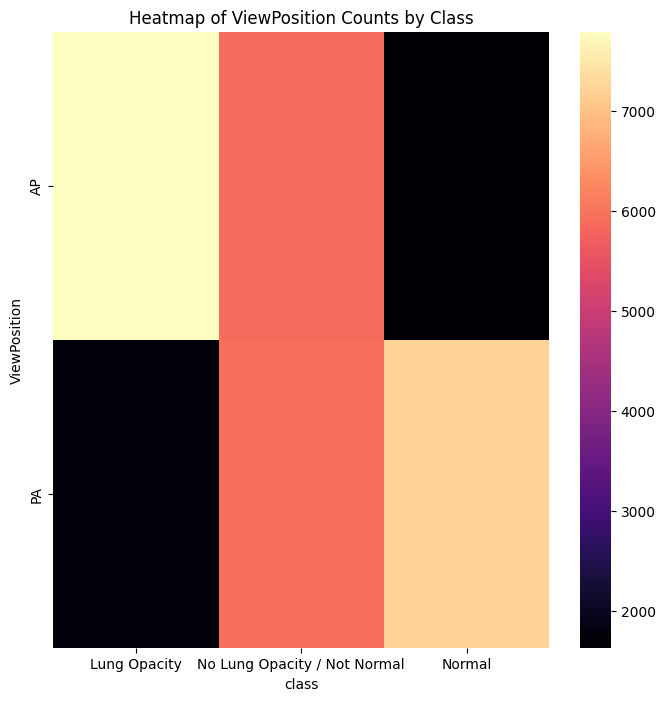

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ViewPosition'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='magma')




# Label axis
plt.xlabel('class')
plt.ylabel('ViewPosition')

## Afix a title to the heat map
plt.title('Heatmap of ViewPosition Counts by Class')


#save the figure
plt.savefig('heatmap_figure.png')

# display the plot
plt.show()



In [ ]:
#Convert Patient Sex to numercal values
dicom_data['PatientSex'] = dicom_data['PatientSex'].map({'F': 0, 'M': 1})

In [ ]:
#convert class to numercal values
class_mapping = {'No Lung Opacity / Not Normal': 0, 'Normal': 0, 'Lung Opacity': 1}
dicom_data['ClassNumeric'] = dicom_data['class'].map(class_mapping)


In [ ]:

#view the first few lines
dicom_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  \
0  No Lung Opacity / Not Normal   
1  No Lung Opacity / Not Normal   
2  No Lung Opacity / Not Normal   
3                        Normal   
4                  Lung Opacity   

                                          image_path Modality  PatientAge  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          51   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          48   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          19   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          28   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...       CR          32   

   PatientSex BodyPartExamined ViewPosition  ClassNumeric  
0           0            CHEST           PA             0  
1           0            CHEST           PA             0  
2           1            CHEST           AP             0  
3           1            CHEST           PA             0  
4           0            CHEST           AP             1

In [ ]:

#generate discriptive statistics
dicom_data.describe(include="all").T

count unique  \
patientId           30227  26684   
x                 30227.0    NaN   
y                 30227.0    NaN   
width             30227.0    NaN   
height            30227.0    NaN   
Target            30227.0    NaN   
class               30227      3   
image_path          30227  26684   
Modality            30227      1   
PatientAge        30227.0    NaN   
PatientSex        30227.0    NaN   
BodyPartExamined    30227      1   
ViewPosition        30227      2   
ClassNumeric      30227.0    NaN   

                                                                top   freq  \
patientId                      3239951b-6211-4290-b237-3d9ad17176db      4   
x                                                               NaN    NaN   
y                                                               NaN    NaN   
width                                                           NaN    NaN   
height                                                          NaN    NaN   
Target                                                          NaN    NaN   
class                                  No Lung Opacity / Not Normal  11821   
image_path        D:/rsna-pneumonia-detection-challenge (1)/stag...      4   
Modality                                                         CR  30227   
PatientAge                                                      NaN    NaN   
PatientSex                                                      NaN    NaN   
BodyPartExamined                                              CHEST  30227   
ViewPosition                                                     AP  15297   
ClassNumeric                                                    NaN    NaN   

                        mean         std  min   25%   50%    75%    max  
patientId                NaN         NaN  NaN   NaN   NaN    NaN    NaN  
x                 124.561683  216.326397  0.0   0.0   0.0  193.0  835.0  
y                 115.960962  190.012883  0.0   0.0   0.0  231.0  881.0  
width              69.060575  106.910496  0.0   0.0   0.0  169.0  528.0  
height            104.084825  176.932152  0.0   0.0   0.0  188.0  942.0  
Target              0.316108    0.464963  0.0   0.0   0.0    1.0    1.0  
class                    NaN         NaN  NaN   NaN   NaN    NaN    NaN  
image_path               NaN         NaN  NaN   NaN   NaN    NaN    NaN  
Modality                 NaN         NaN  NaN   NaN   NaN    NaN    NaN  
PatientAge         46.797764    16.89294  1.0  34.0  49.0   59.0  155.0  
PatientSex          0.569557    0.495146  0.0   0.0   1.0    1.0    1.0  
BodyPartExamined         NaN         NaN  NaN   NaN   NaN    NaN    NaN  
ViewPosition             NaN         NaN  NaN   NaN   NaN    NaN    NaN  
ClassNumeric        0.316108    0.464963  0.0   0.0   0.0    1.0    1.0

In [ ]:

#Check the number of genders
dicom_data.PatientSex.value_counts()


PatientSex
1    17216
0    13011
Name: count, dtype: int64

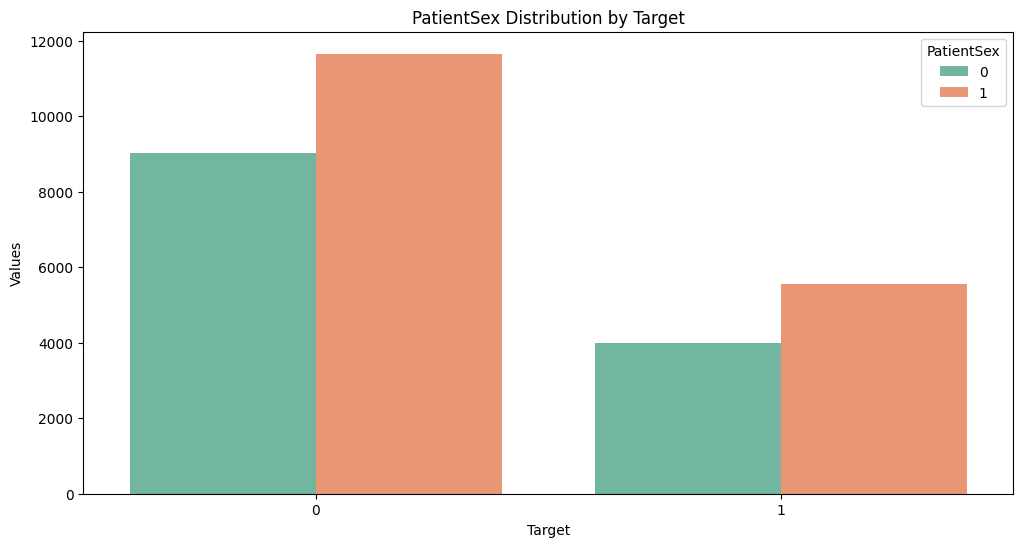

In [ ]:

#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#create aand plot the bar plot
temp = dicom_data.groupby('Target')['PatientSex'].value_counts()
#add values
data_target_class = temp.reset_index(name='Values')

sns.barplot(x='Target', y='Values', hue='PatientSex', data=data_target_class, palette='Set2')

 # Set title and figure size
plt.title('PatientSex and Target for Chest X-Ray Exams')
plt.gcf().set_size_inches(12, 6)


# Add a tittle to the heatmap
plt.title('PatientSex Distribution by Target')


#save the figure
plt.savefig('patient_class_disstribution_by_class.png')


# display the plot
plt.show()


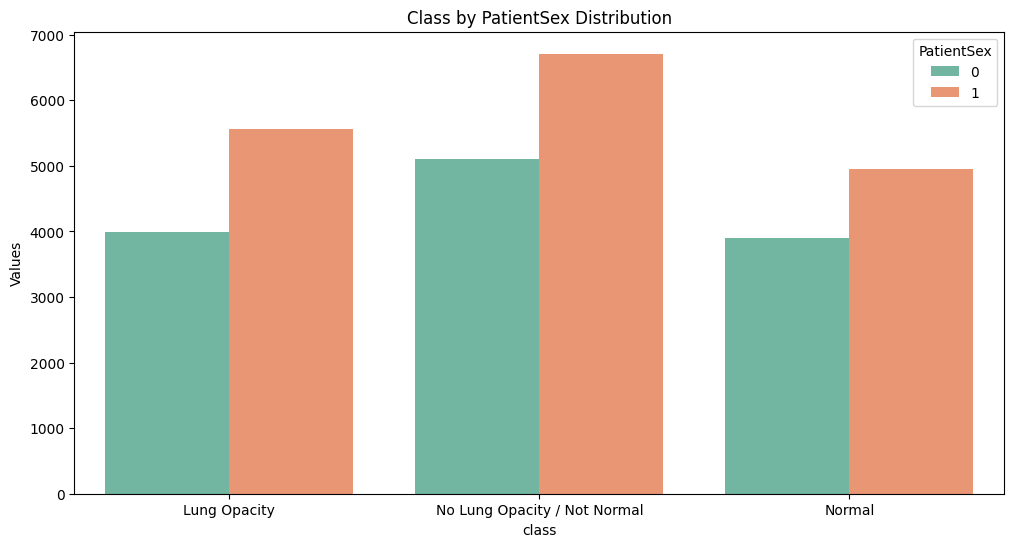

In [ ]:
#Distribution of patient sex vs the the class
fig, ax = plt.subplots(nrows = 1, figsize = (12, 6))
temp = dicom_data.groupby('class')['PatientSex'].value_counts()
data_target_class = pd.DataFrame(data = {'Values': temp.values}, index = temp.index).reset_index()


# define the colour
sns.barplot(ax = ax, x = 'class', y = 'Values', hue = 'PatientSex', data = data_target_class, palette = 'Set2')
plt.title('Class by PatientSex Distribution')



#save figure
plt.savefig('class_by__patientsex_distribution.png')

# show the plot
plt.show()


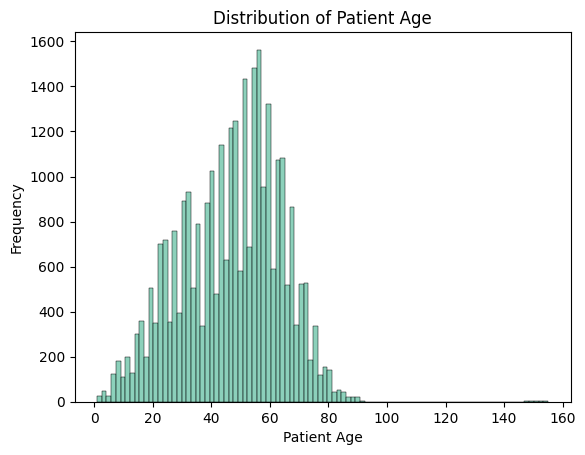

In [ ]:
# set the  colour of the plot
sns.set_palette("Set2")

# Creat the plot
sns.histplot(dicom_data['PatientAge'], kde=False, color=sns.color_palette("Set2")[0])

# Set the labels for the x anf y axis
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
# give a tittle to the plot
plt.title('Distribution of Patient Age')

# Save the plot
plt.savefig('distribution_by_patientage.png')

# display the plot
plt.show()


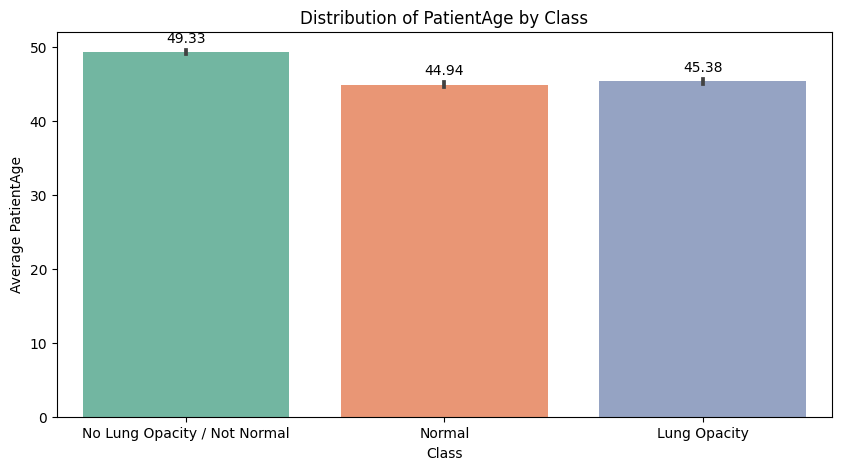

In [ ]:
# #set the figure sise
plt.figure(figsize=(10, 5))

#creat a bar plot
ax = sns.barplot(x='class', y='PatientAge', data=dicom_data, palette='Set2')

# Add value annotation to the bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# set the titles of y and y axis
plt.xlabel('Class')
plt.ylabel('Average PatientAge')
# set the title of the plot
plt.title('Distribution of PatientAge by Class')


#save the figure
plt.savefig('distribution_of_patientage_by_class.png')

# display the plot
plt.show()

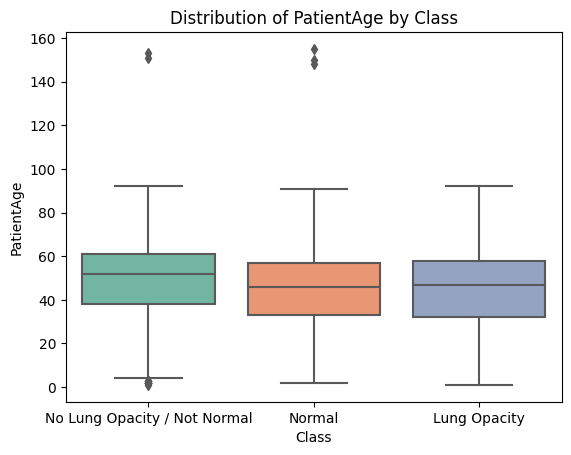

In [ ]:



#Create the box plot
sns.boxplot(x='class', y='PatientAge', data=dicom_data, palette='Set2')


#Add labels to the x and yaxis
plt.xlabel('Class')
plt.ylabel('PatientAge')
# Set a tittle for the plot
plt.title('Distribution of PatientAge by Class')

# Show plot
plt.show()

Distribution of `PatientAge`: Overall and Target = 1


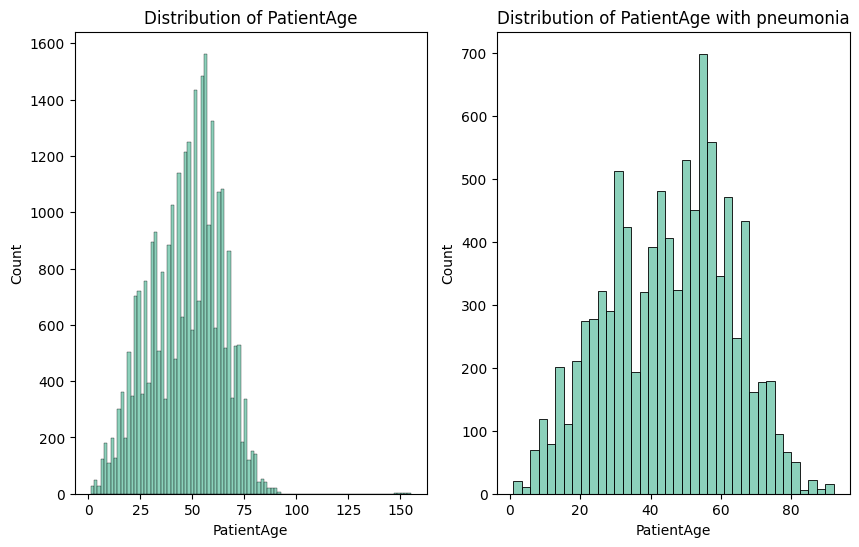

In [ ]:


#set the title of plot
print('Distribution of `PatientAge`: Overall and Target = 1')

#fix the desires size
fig = plt.figure(figsize=(10, 6))

#create the plot
ax = fig.add_subplot(121)
g = sns.histplot(dicom_data['PatientAge'])
g.set_title('Distribution of PatientAge')

#create a subplot
ax = fig.add_subplot(122)
g = sns.histplot(dicom_data.loc[dicom_data['Target'] == 1, 'PatientAge'])

#set the title
g.set_title('Distribution of PatientAge with pneumonia')


# save the plot
plt.savefig('distribution_of_patientAge_with_pneumonia.png')

# display the plots
plt.show()

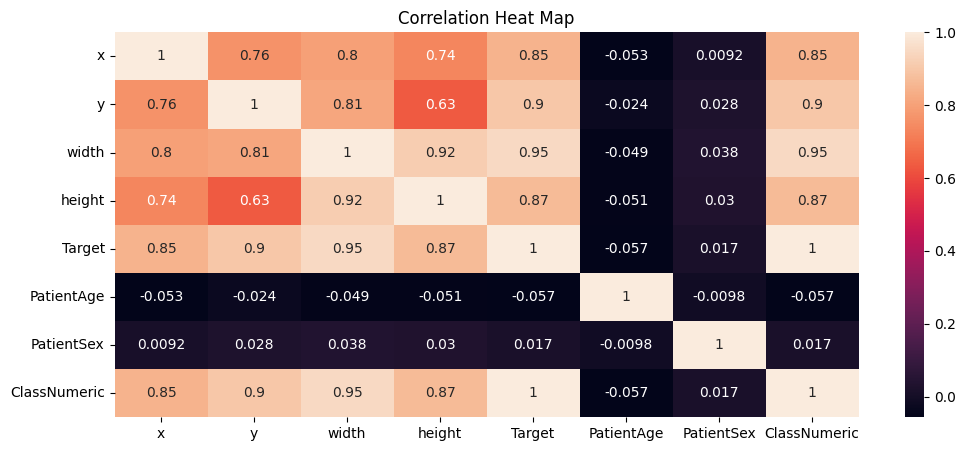

In [ ]:

# plot a correlation heatmap
corr = dicom_data.corr(numeric_only=True)
# Fix the size of the map
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True)
# add title to the map
plt.title('Correlation Heat Map')

# save figure of the map
plt.savefig('correlation_heat_map.png')

# show the map
plt.show()


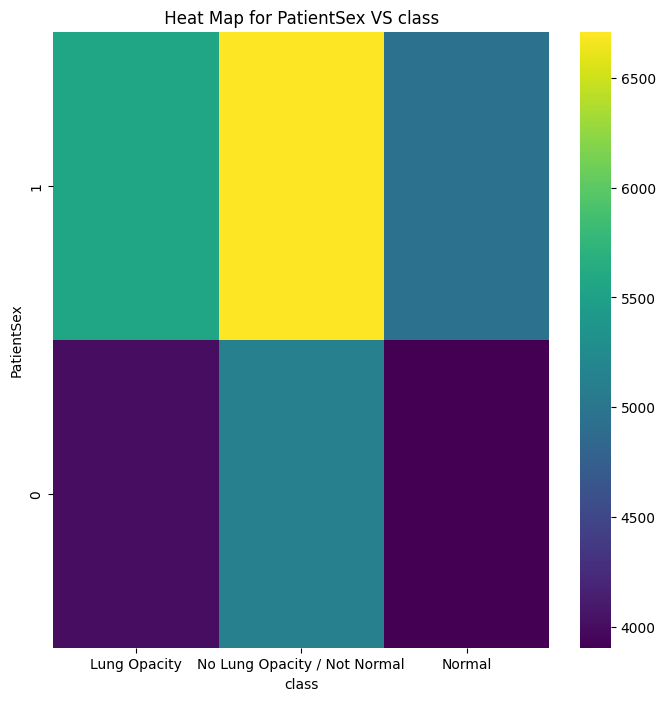

In [ ]:
# import libraries

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


# Decide on the size of the plot
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PatientSex'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('PatientSex')

#add tittle to the plot
plt.title(' Heat Map for PatientSex VS class ')

#save the figure of the plot
plt.savefig('correlation_heat_map_ for_patient_vs_class.png')

# show the plot
plt.show()


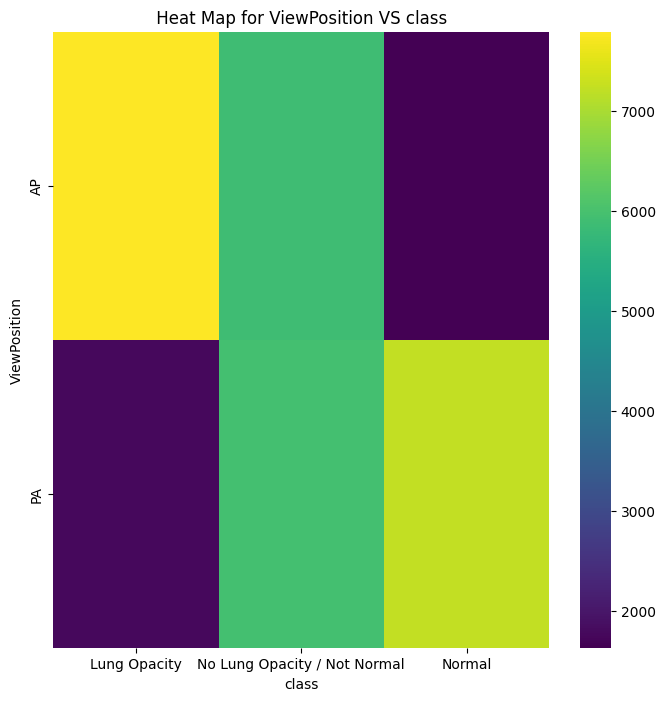

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

#define the size o the plot
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ViewPosition'].value_counts()
    for x_label, grp in dicom_data.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('ViewPosition')

#add a tittle of the heat map

plt.title(' Heat Map for ViewPosition VS class ')

#save the figure of the plot
plt.savefig('correlation_heat_map_ for_viewposition_vs_class.png')

#show plot
plt.show()


In [ ]:
# read in the cloumns needed for training
required_columns = [
    'patientId', 'class', 'image_path', 'PatientAge', 'PatientSex',
    'Modality', 'BodyPartExamined', 'ViewPosition', 'ClassNumeric'
]

# choose only the columns needed
pneumonia_train_data = dicom_data[required_columns]
pneumonia_train_data.head()



patientId                         class  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   

                                          image_path  PatientAge  PatientSex  \
0  D:/rsna-pneumonia-detection-challenge (1)/stag...          51           0   
1  D:/rsna-pneumonia-detection-challenge (1)/stag...          48           0   
2  D:/rsna-pneumonia-detection-challenge (1)/stag...          19           1   
3  D:/rsna-pneumonia-detection-challenge (1)/stag...          28           1   
4  D:/rsna-pneumonia-detection-challenge (1)/stag...          32           0   

  Modality BodyPartExamined ViewPosition  ClassNumeric  
0       CR            CHEST           PA             0  
1       CR            CHEST           PA             0  
2       CR            CHEST           AP             0  
3       CR            CHEST           PA             0  
4       CR            CHEST           AP             1

In [ ]:
!pip install pydicom


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# import the imagegenerator libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
from tensorflow.keras.utils import Sequence

In [ ]:
3import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class DICOMDataGenerator(Sequence):
    def __init__(self, dataframe, batch_size=32, target_size=(224, 224), shuffle=True, augment=False):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.augment = augment
        self.indexes = np.arange(len(self.dataframe))
        self.on_epoch_end()
#add auggmentatiion prarapemeter
        if self.augment:
            self.datagen = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )
        else:
            self.datagen = ImageDataGenerator()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = [self.dataframe.iloc[k] for k in indexes]
        X, y = self.__data_generation(batch_data)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        X = np.empty((self.batch_size, *self.target_size, 3))
        y = np.empty((self.batch_size), dtype=int)
        for i, data in enumerate(batch_data):
            img_path = data['image_path']
            try:
                dicom = pydicom.dcmread(img_path)
                img = dicom.pixel_array
                img = cv2.resize(img, self.target_size)
                if len(img.shape) == 2:   #convert grayscale image to 3 channel images
                    img = np.stack((img,) * 3, axis=-1)

                if self.augment:
                    img = self.datagen.random_transform(img)

                X[i,] = img / 255.0
                y[i] = data['ClassNumeric']
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                X[i,] = np.zeros((*self.target_size, 3))
                y[i] = 0
        return X, y


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

#convert  to numeric
pneumonia_train_data['ClassNumeric'] = pneumonia_train_data['ClassNumeric'].astype(int)

# Split the sampled  data into training , validation and test sets
train_data, test_data = train_test_split(pneumonia_train_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create data generators
train_generator = DICOMDataGenerator(train_data, batch_size=32, target_size=(224, 224))
val_generator = DICOMDataGenerator(val_data, batch_size=32, target_size=(224, 224))
test_generator = DICOMDataGenerator(test_data, batch_size=32, target_size=(224, 224))



C:\Users\770746\AppData\Local\Temp\ipykernel_3364\460145070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pneumonia_train_data['ClassNumeric'] = pneumonia_train_data['ClassNumeric'].astype(int)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import tensorflow as tf

#define a custom F1 sccore metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    p = tp / (tp + fp + tf.keras.backend.epsilon())
    r = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * p * r / (p + r + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
## Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), f1_score])

In [ ]:
# print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

#Train model

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



# Define the early stop call back
early_stopping = EarlyStopping(      # Metic to monitor
    monitor='val_loss',              # no of epoches to run if no improvement
    patience=3,                      # no of epoches to run if no improvement
    restore_best_weights=True,  # Restore model weight from the epoch with the best value  of the monitored metric
    verbose=1
)

#Train the model with early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]  # add the early stopping call back
)



Epoch 1/20
604/604 [==============================] - 386s 638ms/step - loss: 0.5236 - accuracy: 0.7470 - auc: 0.7819 - f1_score: 0.4998 - val_loss: 0.4795 - val_accuracy: 0.7744 - val_auc: 0.8230 - val_f1_score: 0.5932
Epoch 2/20
604/604 [==============================] - 465s 770ms/step - loss: 0.4807 - accuracy: 0.7712 - auc: 0.8145 - f1_score: 0.5831 - val_loss: 0.4670 - val_accuracy: 0.7821 - val_auc: 0.8325 - val_f1_score: 0.6230
Epoch 3/20
604/604 [==============================] - 428s 708ms/step - loss: 0.4680 - accuracy: 0.7789 - auc: 0.8262 - f1_score: 0.5984 - val_loss: 0.4661 - val_accuracy: 0.7800 - val_auc: 0.8322 - val_f1_score: 0.5796
Epoch 4/20
604/604 [==============================] - 472s 782ms/step - loss: 0.4413 - accuracy: 0.7947 - auc: 0.8484 - f1_score: 0.6283 - val_loss: 0.4633 - val_accuracy: 0.7852 - val_auc: 0.8323 - val_f1_score: 0.6287
Epoch 5/20
604/604 [==============================] - 464s 769ms/step - loss: 0.4106 - accuracy: 0.8129 - auc: 0.8708 - 

# Save the Model
After training the model, save it for later use or deployment

In [ ]:
# Save the model
model.save('my_custom_model.h5')
print("Model saved to 'my_custom_model.h5'")



C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to 'my_custom_model.h5'


3. Plot Training History
Plot the training and validation metrics to visualize the performance over epochs.

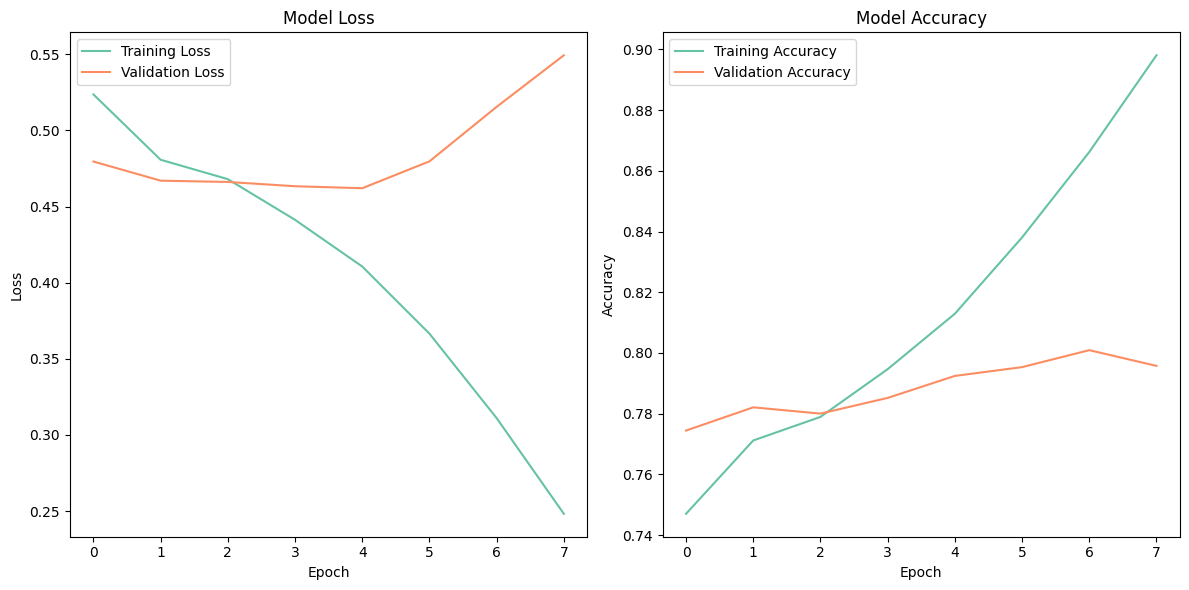

In [ ]:

#import libraries
import matplotlib.pyplot as plt

#plot trining and validation loss
plt.figure(figsize=(12, 6))

#plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss (No Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()



# Evaluate the Model


1/1 [==============================] - 0s 102ms/step
ROC AUC: 0.8404


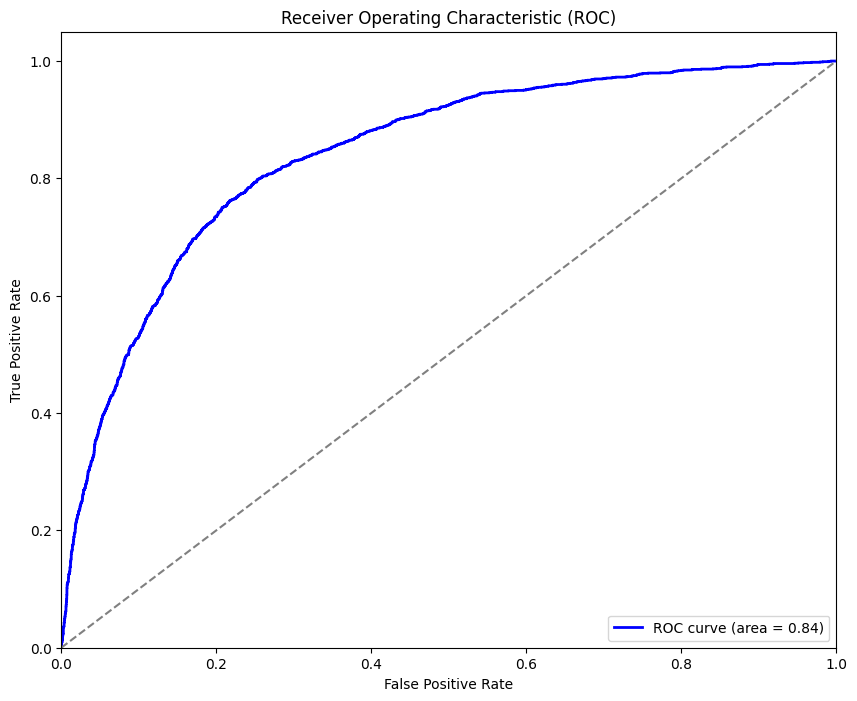

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# evalaute the model using the test data
test_loss, test_accuracy, test_auc, test_f1 = model.evaluate(test_generator, verbose=1)

#Collect true labels and predicted probabilities
y_true = []
y_pred_probs = []

#Iterate over the test data and retrieve true label and predictions
for x_test, y_test in test_generator:
    y_true.extend(y_test)
    probs = model.predict(x_test)
    y_pred_probs.extend(probs)

# Convert the lists to numpy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Calculate predicted classes based on probabilities
y_pred = np.round(y_pred_probs).astype(int)

#callculate RUC and auc curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

#Print the AUC vlaue
print(f"ROC AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()




# Print F1 Score, Precision, and AUC
Calculate and print additional metrics like precision, F1 score, and AUC.

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
test_labels = []
test_predictions = []

for i in range(len(test_generator)):
    x_test, y_test = test_generator[i]
    test_labels.extend(y_test)
    test_predictions.extend(model.predict(x_test).round())

test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)

#generate the classification report
report = classification_report(test_labels, test_predictions, target_names=['Class 0', 'Class 1'])
print(report)


1/1 [==============================] - 0s 93ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.89      0.85      4111
     Class 1       0.71      0.57      0.63      1905

    accuracy                           0.79      6016
   macro avg       0.76      0.73      0.74      6016
weighted avg       0.78      0.79      0.78      6016



 # Plot Confusion Matrix
 Vsulaize the confusion matrix to understand the classification performance

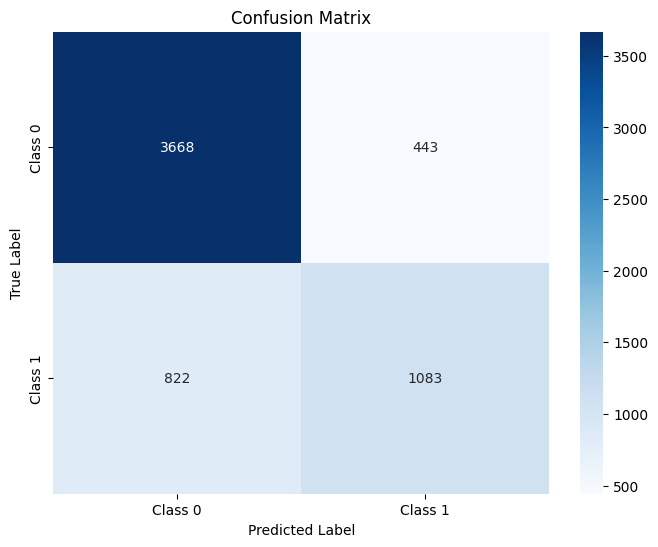

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confussion matrix
cm = confusion_matrix(test_labels, test_predictions)

# plot the confusion matix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
# label the x axis
plt.xlabel('Predicted Label')
#label the y axis
plt.ylabel('True Label')
#add tiltle
plt.title('Confusion Matrix')
#display plot
plt.show()


1/1 [==============================] - 0s 91ms/step
Shape of images in the batch: (224, 224, 3)


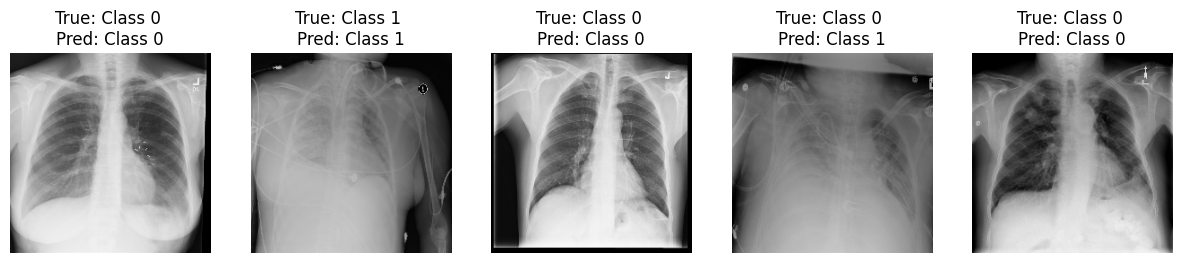

In [ ]:
import matplotlib.pyplot as plt

def plot_images_with_predictions(images, true_labels, predictions, class_names, num_images=5):
    plt.figure(figsize=(15, 5))

      # check to view the 1st image
    img_shape = images[0].shape
    print(f"Shape of images in the batch: {img_shape}")

    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        # Adjust the shape based on the actual dimension of your images
        if len(img_shape) == 3:   # on the actual dimension of the images
            plt.imshow(images[i])
        else:   # Gray images
            plt.imshow(images[i].reshape((224, 224)), cmap='gray')
        plt.title(f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predictions[i])]}")  # Ensure labels are integers
        plt.axis('off')

    plt.show()

# Fetch a batch of images and labels from the test generators
for x_test_batch, y_test_batch in test_generator:
    break  # break only the first batch for display # Get only the first batch for display

# Generate prediction for this batch
predictions_batch = model.predict(x_test_batch).round()


class_names = ['Class 0', 'Class 1']

#show images
plot_images_with_predictions(x_test_batch, y_test_batch, predictions_batch, class_names, num_images=5)


Step-by-Step Integration with Keras Tuner


In [ ]:
pip install keras-tuner


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Hyper-paramerter Tunning

Define a function to build the model . The function recives hyperparameter objects from Keras Turner

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from keras_tuner import HyperParameters
from sklearn.metrics import f1_score

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_3_filters', min_value=128, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=64),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=0.01, max_value=0.1, step=0.01))
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    )

    # Print model summary
    model.summary()

    return model


Trial 5 Complete [01h 35m 02s]
val_auc: 0.8181959390640259

Best val_auc So Far: 0.8181959390640259
Total elapsed time: 11h 00m 13s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 96)      27744     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 192)       1

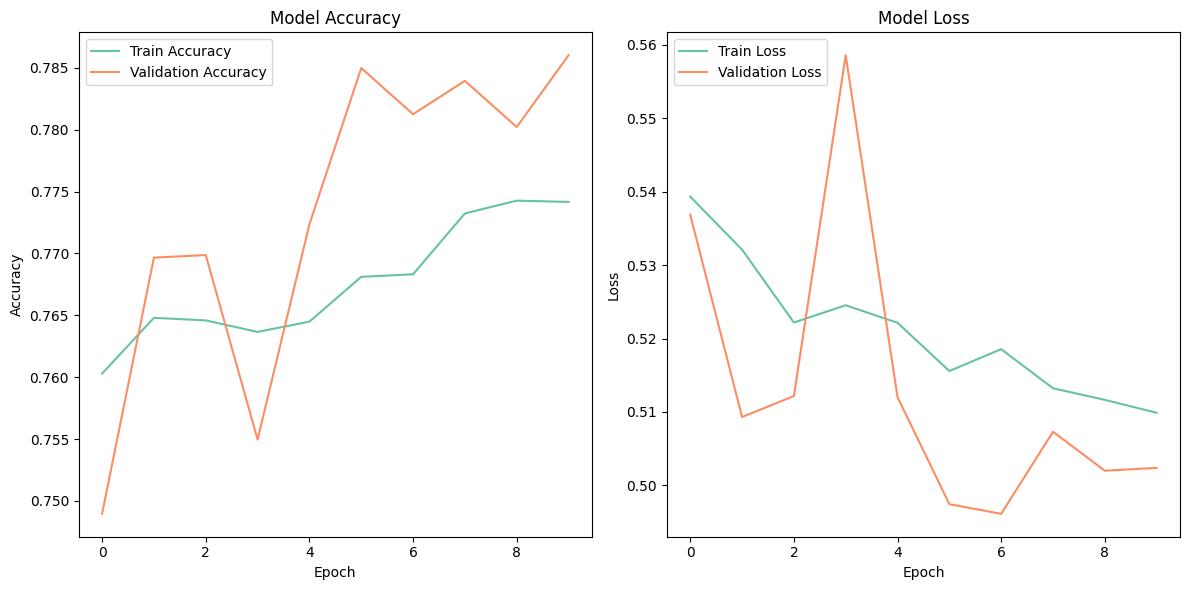

In [ ]:
import keras_tuner as kt
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define the objective explicitly
objective = kt.Objective('val_auc', direction='max')


# Define the Randomsearch
tuner = kt.RandomSearch(
    build_model,  # Assuming `build_model` is defined in a previous cell
    objective=objective,
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='pneumonia_model_tuning'
)

# Clear old tuner data if needed (ensure the directory is empty or use a new directory)
import shutil
shutil.rmtree('my_dir', ignore_errors=True)

# Search for the best hyperparameters
tuner.search(
    train_generator,             # Training data
    validation_data=val_generator,  # Validation data
    epochs=10                    # Number of epochs per trial
)

# Get the best model and hyperparameters
try:
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("Best Hyperparameters:", best_hyperparameters.values)
except Exception as e:
    print(f"An error occurred: {e}")



# Train the best model again afater the tuning on the full data
history = best_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can adjust the epochs as needed
)

#plot model history
def plot_history(history):
    # Extract the history dictionary
    hist = history.history


    #plot training and validation
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # plot training and validation history
    plt.subplot(1, 2, 2)
    plt.plot(hist['loss'], label='Train Loss')
    plt.plot(hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# plot history
plot_history(history)




2. Compute Precision, Recall, F1 Score, AUC, and Confusion Matrix
To compute these metrics, you will need to evaluate your model on the test set. Make sure you have the necessary libraries imported:

188/188 [==============================] - 74s 392ms/step - loss: 0.5073 - accuracy: 0.7871 - auc: 0.8245 - precision: 0.6907 - recall: 0.5932
Test Loss: 0.5073062181472778
Test Accuracy: 0.7870678305625916
Test AUC: 0.8244502544403076
Test Precision: 0.6907090544700623
Test Recall: 0.5931758284568787
1/1 [==============================] - 0s 137ms/step
Precision: 0.690519877675841
Recall: 0.5926509186351706
Accuracy: 0.7869015957446809
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4111
           1       0.69      0.59      0.64      1905

    accuracy                           0.79      6016
   macro avg       0.76      0.73      0.74      6016
weighted avg       0.78      0.79      0.78      6016



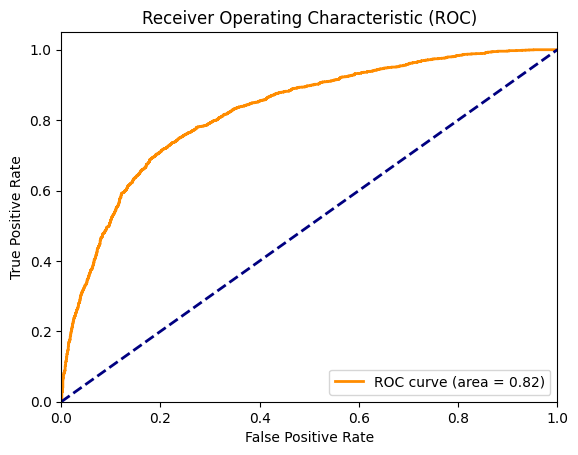

Confusion Matrix:
[[3605  506]
 [ 776 1129]]


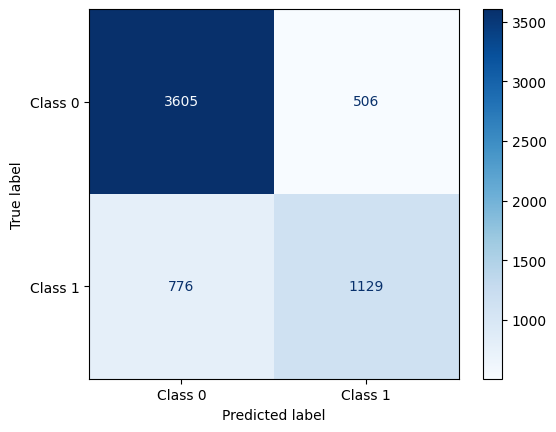

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define function to get the true labels from the generator
def get_labels_and_predictions(generator, model):
    y_true = []
    y_pred = []
    for batch in generator:
        X_batch, y_batch = batch
        y_true.extend(y_batch)
        y_pred.extend(model.predict(X_batch))
    return np.array(y_true), np.array(y_pred).flatten()


try:
    # Evaluate the best model out odf all on the test set
    test_loss, test_accuracy, test_auc, test_precision, test_recall = best_model.evaluate(test_generator)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test AUC: {test_auc}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")

     # get the predictions and true label
    y_true, y_pred = get_labels_and_predictions(test_generator, best_model)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # get and print prdiction , recall, and accuracy
    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    accuracy = accuracy_score(y_true, y_pred_classes)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

   # Compute and plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

       # generate anplot cofusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
    cmd.plot(cmap='Blues')
    plt.show()

except ValueError as e:
    print(f"Error occurred: {e}")


1/1 [==============================] - 0s 201ms/step
Shape of images in the batch: (224, 224, 3)


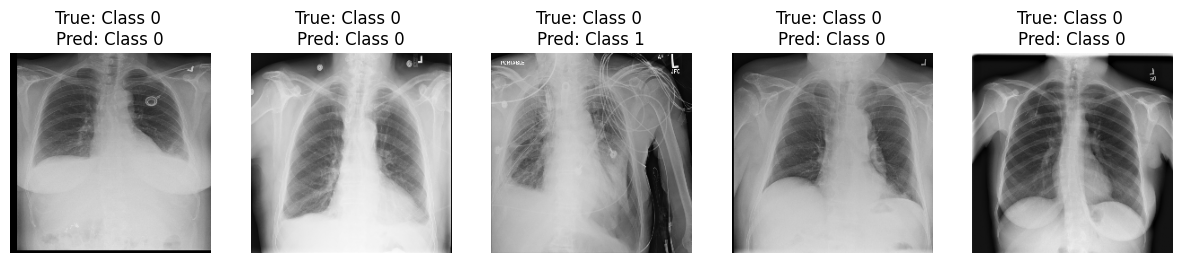

In [ ]:
import matplotlib.pyplot as plt

def plot_images_with_predictions(images, true_labels, predictions, class_names, num_images=5):
    plt.figure(figsize=(15, 5))


    #check theshape of the first image
    img_shape = images[0].shape
    print(f"Shape of images in the batch: {img_shape}")

    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)

        #adjust the shape based on the actual dimension
        if len(img_shape) == 3:  # color or gray scale images
            plt.imshow(images[i])
        else:  # Grayscale images
            plt.imshow(images[i].reshape((224, 224)), cmap='gray')
        plt.title(f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predictions[i])]}")  # Ensure labels are integers
        plt.axis('off')

    plt.show()

#get a batch image and labels from the test generator
for x_test_batch, y_test_batch in test_generator:
    break  # Get only the first batch for display

#generate predictions from this batch
predictions_batch = model.predict(x_test_batch).round()

#add class names
class_names = ['Class 0', 'Class 1']

# display images
plot_images_with_predictions(x_test_batch, y_test_batch, predictions_batch, class_names, num_images=5)